In [1]:
import json
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import itertools
from collections import Counter
from matplotlib_venn import venn3
import matplotlib.font_manager as fm
import seaborn as sns

In [2]:
import os
path = "D:/Coding/Caleb"
os.chdir(path)
os.getcwd()

'D:\\Coding\\Caleb'

In [3]:
df_time = pd.read_json('./data/time.json')
df_general = pd.read_json('./data/general.json')
df_popularity = pd.read_json('./data/popularity.json')
df_combined = pd.concat([df_time, df_general, df_popularity])

In [4]:
df_combined.shape

(1316, 21)

In [5]:
df_combined.head()

note_id    type  \
0  67c27a66000000000603d771   video   
1  67c27a45000000002903da90  normal   
2  67c27a2c0000000006028cc9  normal   
3  67c2783b000000000602822a  normal   
4  67c275e8000000002602dfc2  normal   

                                               title  \
0                                            ÊòØË∞ÅÁöÑÂç°ÂÜåÊù•‰∫Ü   
1  ÂìáÂ°ûÔºåËøôÂ∞±ÊòØ‰Ω†‰ª¨Ê∏©ËâØÂì•Êé®ÂêóÔºåËØ¥‰∏çËøáÂ∞±ÂºÄÂßã‰∏æÊä•‰∫Ü\n#Ê≤àÊòüÂõû[ËØùÈ¢ò]#  #Â§è‰ª•ÊòºÁöÑÂ•≥‰∫∫ÊòØÂ∞èÂÅ∑...   
2                                       Â∞±Ëøô‰πàÂíåÂ§è‰ª•ÊòºÂè±Âí§È£é‰∫ëüòº   
3                                          Ê®°‰ªøÂ§è‰ª•ÊòºÁ≠æÂêçË¢´Êäì   
4     DeepSeekÈÄ†Á¶è‰∫∫Á±ª[Ëâ≤Ëâ≤R]Áªà‰∫éËØ¥Âá∫Êù•‰∫ÜÔºåÂ§è‰ª•Êòº‰Ω†‰∏çÊòØËÉÜÂ∞èÈ¨º#ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº[ËØùÈ¢ò]#   

                                                desc  \
0  ÁªôÂ§ßÂÆ∂ÂáÜÂ§áÁöÑÁ¶èÁ¶èÊù•Âï¶\nÔªø#ÊÅã‰∏éÊ∑±Á©∫[ËØùÈ¢ò]#Ôªø Ôªø#ÊãÜÂç°[ËØùÈ¢ò]#Ôªø Ôªø#‰∫åÂàõ[ËØùÈ¢ò]#Ôªø...   
1  ÂìáÂ°ûÔºåËøôÂ∞±ÊòØ‰Ω†‰ª¨Ê∏©ËâØÂì•Êé®ÂêóÔºåËØ¥‰∏çËøáÂ∞±ÂºÄÂßã‰∏æÊä•‰∫Ü\n#Ê≤àÊòüÂõû[ËØùÈ¢ò]#  #Â§è‰ª•ÊòºÁöÑÂ•≥‰∫∫ÊòØÂ∞èÂÅ∑...   
2  Ëøá‰∫Ü‰∏§Âπ¥ÔºåÂ¶π‰πüÂÅ∑ÂÅ∑ÂéªÂèÇÂä†‰∫ÜÊØîÊ≠¶Â§ß‰ºöÔºåÂêÑÂÆ∂ÂæàÂø´Â∞±ËÆ§Âá∫Êù•Â¶πÁî®ÁöÑÊãõÂºèÊòØÂ§è‰ª•ÊòºÁöÑÂΩ±Â≠ê\nÂ¶πÂíåÂì•‰∏ÄÊ†∑Èªò...   
3            #ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº[ËØùÈ¢ò]# #Â§è‰ª•Êòº[ËØùÈ¢ò]# #talkmaker[ËØùÈ¢ò]#   
4     DeepSeekÈÄ†Á¶è‰∫∫Á±ª[Ëâ≤Ëâ≤R]Áªà‰∫éËØ¥Âá∫Êù•‰∫ÜÔºåÂ§è‰ª•Êòº‰Ω†‰∏çÊòØËÉÜÂ∞èÈ¨º#ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº[ËØùÈ¢ò]#   

                                           video_url           time  \
0  http://sns-video-bd.xhscdn.com/spectrum/1040g3...  1740798566000   
1                                                     1740798533000   
2                                                     1740798508000   
3                                                     1740798011000   
4                                                     1740797416000   

     last_update_time                   user_id nickname  \
0 2025-03-01 03:09:27  666c6100000000000d026ec1   ËäùÂ£´Â°îÁà±ÊãÜÂç°   
1 2025-03-01 03:08:53  60587996000000000101f0c5       Ê≤àÁèè   
2 2025-03-01 03:08:29  632510f2000000002303c666  ‰∏ã‰∏ÄÂë®Êúâ‰∏ãÈõ®Â§©   
3 2025-03-01 03:00:12  66067a58000000000d025499      ÂïÜÁßãÂÆ¥   
4 2025-03-01 02:58:17  5fb658300000000001005cb4       ÂúàÂúà   

                                              avatar  ... collected_count  \
0  https://sns-avatar-qc.xhscdn.com/avatar/1040g2...  ...               0   
1  https://sns-avatar-qc.xhscdn.com/avatar/1040g2...  ...               0   
2  https://sns-avatar-qc.xhscdn.com/avatar/1040g2...  ...               0   
3  https://sns-avatar-qc.xhscdn.com/avatar/1040g2...  ...               1   
4  https://sns-avatar-qc.xhscdn.com/avatar/0dd6f7...  ...               0   

  comment_count share_count ip_location  \
0             0           0          Ê≤≥Âåó   
1             0           0          Ê±üËãè   
2             0           0          ÂπøË•ø   
3             4           1          ÊπñÂåó   
4             0           0          Âåó‰∫¨   

                                          image_list  \
0  http://sns-webpic-qc.xhscdn.com/202503011110/e...   
1  http://sns-webpic-qc.xhscdn.com/202503011110/9...   
2  http://sns-webpic-qc.xhscdn.com/202503011110/1...   
3  http://sns-webpic-qc.xhscdn.com/202503011111/3...   
4  http://sns-webpic-qc.xhscdn.com/202503011111/4...   

                               tag_list last_modify_ts  \
0        ÊÅã‰∏éÊ∑±Á©∫,ÊãÜÂç°,‰∫åÂàõ,Ê≤àÊòüÂõû,ÈªéÊ∑±,Á•ÅÁÖú,Áß¶ÂΩª,Â§è‰ª•Êòº,Âç°ÂÜå  1740798696457   
1  Ê≤àÊòüÂõû,Â§è‰ª•ÊòºÁöÑÂ•≥‰∫∫ÊòØÂ∞èÂÅ∑,Â§è‰ª•ÊòºÁöÑÂ•≥‰∫∫‰∏çËØª‰π¶,Â§è‰ª•ÊòºÁöÑÂ•≥‰∫∫ÂêÉÊãºÂ•ΩÈ•≠‰∏≠ÊØí  1740798696461   
2                      ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº,Â§è‰ª•Êòº,ÊÅã‰∏éÊ∑±Á©∫  1740798696480   
3                 ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº,Â§è‰ª•Êòº,talkmaker  1740798696497   
4                               ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº  1740798696517   

                                            note_url source_keyword  \
0  https://www.xiaohongshu.com/explore/67c27a6600...            Â§è‰ª•Êòº   
1  https://www.xiaohongshu

In [6]:
df_combined.describe(include=['object']) 

note_id    type     title       desc video_url  \
count                       1316    1316      1316       1316      1316   
unique                       869       2       863        834       171   
top     67bbc472000000000d01790d  normal  ÊÅã‰∏éÊ∑±Á©∫/Â§è‰ª•Êòº  #Â§è‰ª•Êòº[ËØùÈ¢ò]#             
freq                           5    1122         5         10      1122   

                         user_id nickname  \
count                       1316     1316   
unique                       702      677   
top     5b0ac7d011be1011881b6cc6     momo   
freq                          27       38   

                                                   avatar liked_count  \
count                                                1316        1316   
unique                                                700         620   
top     https://sns-avatar-qc.xhscdn.com/avatar/1040g2...         10+   
freq                                                   27          56   

       collected_count comment_count share_count ip_location  \
count             1316          1316        1316        1316   
unique             488           441         533          45   
top                  0             0           0               
freq               176           153         227         275   

                                               image_list  tag_list  \
count                                                1316      1316   
unique                                               1316       492   
top     http://sns-webpic-qc.xhscdn.com/202503011157/6...  ÊÅã‰∏éÊ∑±Á©∫,Â§è‰ª•Êòº   
freq                                                    1       106   

                                                 note_url source_keyword  \
count                                                1316           1316   
unique                                                904              2   
top     https://www.xiaohongshu.com/explore/679c8b7500...        ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº   
freq                                                    4            659   

                                            xsec_token  
count                                             1316  
unique                                             904  
top     ABo4VxCS3ji62fWCE7-uJQZbK0yy6yclCGu7UqIGSEMtU=  
freq                                                 4

In [7]:
#note_id and note_url is not 1-1 match
df_combined["id_url_combi"] = df_combined["note_id"] + '--' + df_combined["note_url"]
df_check = df_combined.drop_duplicates(subset="id_url_combi", keep="first")
dupes_note_id = df_check[df_check.duplicated("note_id", keep=False)]

In [8]:
dupes_note_id.sort_values("note_id").head()

note_id    type             title  \
160  678327cf000000000203f6eb  normal  ÊÑüËßâÂè†ÊääÂ§è‰ª•ÊòºÊãñËøô‰πà‰πÖËõÆÊúâÊÑèÊÄùÁöÑ   
197  678327cf000000000203f6eb  normal  ÊÑüËßâÂè†ÊääÂ§è‰ª•ÊòºÊãñËøô‰πà‰πÖËõÆÊúâÊÑèÊÄùÁöÑ   
182  67a47be10000000028028397  normal          Â§è‰ª•Êòº‰Ω†Âú®ÂÅö‰ªÄ‰πà   
112  67a47be10000000028028397  normal          Â§è‰ª•Êòº‰Ω†Âú®ÂÅö‰ªÄ‰πà   
217  67ad8f300000000018006059  normal   Ë∑üÊàëÂõûÂéªÂçÅÂÖ´Â≤ÅÔºå‰∏çË¶ÅË¢´ÂëΩËøêÊâæÂà∞   

                                                  desc video_url  \
160  Â¶ÇÊûú‰ªñ‰∏ÄÂºÄÂßãÂ∞±ÊòØÁôΩÂàáÈªë‰∏äÂú∫ÔºåÊàñËÄÖÂè™Áïô‰∫Ü‰∏™ÂêçÂ≠óÔºåÂ§ßÂÆ∂‰πü‰∏ç‰ºöÂ∫îÊøÄÔºå‰ΩÜÊÅ∞ÊÅ∞Â∞±ÊòØ‰ªñËøô‰∏™‰∫∫‰∏ç‰ªÖÁªô‰∫ÜÁïô‰∫Ü...             
197  Â¶ÇÊûú‰ªñ‰∏ÄÂºÄÂßãÂ∞±ÊòØÁôΩÂàáÈªë‰∏äÂú∫ÔºåÊàñËÄÖÂè™Áïô‰∫Ü‰∏™ÂêçÂ≠óÔºåÂ§ßÂÆ∂‰πü‰∏ç‰ºöÂ∫îÊøÄÔºå‰ΩÜÊÅ∞ÊÅ∞Â∞±ÊòØ‰ªñËøô‰∏™‰∫∫‰∏ç‰ªÖÁªô‰∫ÜÁïô‰∫Ü...             
182                             #ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº[ËØùÈ¢ò]# #Âì•Êé®[ËØùÈ¢ò]#             
112                             #ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº[ËØùÈ¢ò]# #Âì•Êé®[ËØùÈ¢ò]#             
217  ‚ÄúÊàë‰ª¨‰∏çË¶ÅÂú®ËøôÈáåÔºåË∑üÊàëÂõûÂéªÂçÅÂÖ´Â≤ÅÔºåË∫≤Âà∞Êµ∑Ê£†Ê†ë‰∏ãÔºå‰∏çË¶ÅË¢´ÂëΩËøêÊâæÂà∞„ÄÇ‚Äù\n\t\n@amaryl...             

              time    last_update_time                   user_id nickname  \
160  1736648655000 2025-02-17 10:22:32  6567665300000000200337b8  kingher   
197  1736648655000 2025-02-17 10:22:32  6567665300000000200337b8  kingher   
182  1738832865000 2025-02-19 16:00:01  5f6f4d690000000001003878    ‰ªäÂ§©ÂêÉ‰ªÄ‰πà   
112  1738832865000 2025-02-19 16:00:01  5f6f4d690000000001003878    ‰ªäÂ§©ÂêÉ‰ªÄ‰πà   
217  1739427632000 2025-02-13 14:27:12  602debae000000000101de91    Ê¢®Ê¢®Ê¢®Ê¢®Ê¢®   

                                                avatar  ... comment_count  \
160  https://sns-avatar-qc.xhscdn.com/avatar/1040g2...  ...           813   
197  https://sns-avatar-qc.xhscdn.com/avatar/1040g2...  ...           10+   
182  https://sns-avatar-qc.xhscdn.com/avatar/5f6f4d...  ...           10+   
112  https://sns-avatar-qc.xhscdn.com/avatar/5f6f4d...  ...           210   
217  https://sns-avatar-qc.xhscdn.com/avatar/1040g2...  ...           10+   

    share_count ip_location  \
160         703          ÊµôÊ±ü   
197         10+          ÊµôÊ±ü   
182         10+          Â±±‰∏ú   
112         231          Â±±‰∏ú   
217         1ÂçÉ+          Â±±‰∏ú   

                                            image_list         tag_list  \
160  http://sns-webpic-qc.xhscdn.com/202503011212/9...   ÊÅã‰∏éÊ∑±Á©∫,Â§è‰ª•ÊòºÂõûËà™,Â§è‰ª•Êòº   
197  http://sns-webpic-qc.xhscdn.com/202503011119/5...   ÊÅã‰∏éÊ∑±Á©∫,Â§è‰ª•ÊòºÂõûËà™,Â§è‰ª•Êòº   
182  http://sns-webpic-qc.xhscdn.com/202503011118/f...       ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº,Âì•Êé®   
112  http://sns-webpic-qc.xhscdn.com/202503011210/6...       ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº,Âì•Êé®   
217  http://sns-webpic-qc.xhscdn.com/202503011119/5...  Â§è‰ª•Êòº,ÊÅã‰∏éÊ∑±Á©∫,ÊÅã‰∏éÊ∑±Á©∫ÂÜôÁúü   

    last_modify_ts                                           note_url  \
160  1740802413374  https://www.xiaohongshu.com/explore/678327cf00...   
197  1740799145898  https://www.xiaohongshu.com/explore/678327cf00...   
182  1740799145467  https://www.xiaohongshu.com/explore/67a47be100...   
112  1740802269743  https://www.xiaohongshu.com/explore/67a47be100...   
217  1740799196547  https://www.xiaohongshu.com/explore/67ad8f3000...   

     source_keyword                                      xsec_token  \
160             Â§è‰ª•Êòº  AB5-itMsb5o9MDRzQd-MGjLuMeLw0wX2Lr3hJXdLzBhQ4=   
197             Â§è‰ª•Êòº  ABzRwYHfzHjFMxmNxaYiiY7IK_NOerk03cS-uG3weqf1Q=   
182             Â§è‰ª•Êòº  ABcpYqdVVE83Xm6WD5Aws_czmg6rUv_NIMj-ZvJRo-0IY=   
112             Â§è‰ª•Êòº  AB6erGbRtrkM_8GrWWpUBhnyYsMOD4FIcNnQ-IwnYemPM=   
217             Â§è‰ª•Êòº  ABvrUaZH01Wbj349wboViyrtlfp8WSDnU2dfiehIXC87w=   

                                          id_url_combi  
160  678327cf000000000203f6eb--https://www.xiaohong...  
197  678327cf000000000203f6eb--https://www.xiaohong...  
182  67a47be10000000028028397--https:

In [9]:
dupes_note_id.sort_values("note_id")[["note_id","note_url","title","user_id"]].iloc[0,1]

'https://www.xiaohongshu.com/explore/678327cf000000000203f6eb?xsec_token=AB5-itMsb5o9MDRzQd-MGjLuMeLw0wX2Lr3hJXdLzBhQ4=&xsec_source=pc_search'

In [10]:
dupes_note_id.sort_values("note_id")[["note_id","note_url","title","user_id"]].iloc[1,1]

'https://www.xiaohongshu.com/explore/678327cf000000000203f6eb?xsec_token=ABzRwYHfzHjFMxmNxaYiiY7IK_NOerk03cS-uG3weqf1Q=&xsec_source=pc_search'

In [11]:
'''base on above observation, notice that the link difference is due to different xsec-token, 
which is not related to the scraped content, therefore, we should simply remove duplicates, 
using note_id as the identifier'''

'base on above observation, notice that the link difference is due to different xsec-token, \nwhich is not related to the scraped content, therefore, we should simply remove duplicates, \nusing note_id as the identifier'

In [12]:
df = df_combined.drop_duplicates('note_id')
df.describe(include=['object']) 

note_id    type          title       desc video_url  \
count                        869     869            869        869       869   
unique                       869       2            863        834       171   
top     67c013b6000000002901196b  normal  Ë∞ÅË¶ÅÊù•ÂÆöÂà∂Â§è‰ª•ÊòºÁöÑÂéüÂ£∞ËØ≠Èü≥  #Â§è‰ª•Êòº[ËØùÈ¢ò]#             
freq                           1     699              2          8       699   

                         user_id nickname  \
count                        869      869   
unique                       702      677   
top     5b0ac7d011be1011881b6cc6      Â§è‰ª•Êòº   
freq                          25       28   

                                                   avatar liked_count  \
count                                                 869         869   
unique                                                700         498   
top     https://sns-avatar-qc.xhscdn.com/avatar/1040g2...         10+   
freq                                                   25          50   

       collected_count comment_count share_count ip_location  \
count              869           869         869         869   
unique             416           413         377          45   
top                  0             0           0               
freq               158           132         202         181   

                                               image_list  tag_list  \
count                                                 869       869   
unique                                                869       492   
top     http://sns-webpic-qc.xhscdn.com/202503011157/0...  ÊÅã‰∏éÊ∑±Á©∫,Â§è‰ª•Êòº   
freq                                                    1        59   

                                                 note_url source_keyword  \
count                                                 869            869   
unique                                                869              2   
top     https://www.xiaohongshu.com/explore/67c013b600...            Â§è‰ª•Êòº   
freq                                                    1            509   

                                            xsec_token  \
count                                              869   
unique                                             869   
top     ABWFutQa255dEGxnot92Bfh6MwVEquORSYxdADUJ6qL4U=   
freq                                                 1   

                                             id_url_combi  
count                                                 869  
unique                                                869  
top     67c013b6000000002901196b--https://www.xiaohong...  
freq                                                    1

In [13]:
df = df.copy()
df["time"] = pd.to_datetime(df["time"], unit="ms", origin="unix", utc=True).dt.tz_localize(None)
df["last_modify_ts"] = pd.to_datetime(df["last_modify_ts"], unit="ms", origin="unix", utc=True).dt.tz_localize(None)
df.head()

note_id    type  \
0  67c27a66000000000603d771   video   
1  67c27a45000000002903da90  normal   
2  67c27a2c0000000006028cc9  normal   
3  67c2783b000000000602822a  normal   
4  67c275e8000000002602dfc2  normal   

                                               title  \
0                                            ÊòØË∞ÅÁöÑÂç°ÂÜåÊù•‰∫Ü   
1  ÂìáÂ°ûÔºåËøôÂ∞±ÊòØ‰Ω†‰ª¨Ê∏©ËâØÂì•Êé®ÂêóÔºåËØ¥‰∏çËøáÂ∞±ÂºÄÂßã‰∏æÊä•‰∫Ü\n#Ê≤àÊòüÂõû[ËØùÈ¢ò]#  #Â§è‰ª•ÊòºÁöÑÂ•≥‰∫∫ÊòØÂ∞èÂÅ∑...   
2                                       Â∞±Ëøô‰πàÂíåÂ§è‰ª•ÊòºÂè±Âí§È£é‰∫ëüòº   
3                                          Ê®°‰ªøÂ§è‰ª•ÊòºÁ≠æÂêçË¢´Êäì   
4     DeepSeekÈÄ†Á¶è‰∫∫Á±ª[Ëâ≤Ëâ≤R]Áªà‰∫éËØ¥Âá∫Êù•‰∫ÜÔºåÂ§è‰ª•Êòº‰Ω†‰∏çÊòØËÉÜÂ∞èÈ¨º#ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº[ËØùÈ¢ò]#   

                                                desc  \
0  ÁªôÂ§ßÂÆ∂ÂáÜÂ§áÁöÑÁ¶èÁ¶èÊù•Âï¶\nÔªø#ÊÅã‰∏éÊ∑±Á©∫[ËØùÈ¢ò]#Ôªø Ôªø#ÊãÜÂç°[ËØùÈ¢ò]#Ôªø Ôªø#‰∫åÂàõ[ËØùÈ¢ò]#Ôªø...   
1  ÂìáÂ°ûÔºåËøôÂ∞±ÊòØ‰Ω†‰ª¨Ê∏©ËâØÂì•Êé®ÂêóÔºåËØ¥‰∏çËøáÂ∞±ÂºÄÂßã‰∏æÊä•‰∫Ü\n#Ê≤àÊòüÂõû[ËØùÈ¢ò]#  #Â§è‰ª•ÊòºÁöÑÂ•≥‰∫∫ÊòØÂ∞èÂÅ∑...   
2  Ëøá‰∫Ü‰∏§Âπ¥ÔºåÂ¶π‰πüÂÅ∑ÂÅ∑ÂéªÂèÇÂä†‰∫ÜÊØîÊ≠¶Â§ß‰ºöÔºåÂêÑÂÆ∂ÂæàÂø´Â∞±ËÆ§Âá∫Êù•Â¶πÁî®ÁöÑÊãõÂºèÊòØÂ§è‰ª•ÊòºÁöÑÂΩ±Â≠ê\nÂ¶πÂíåÂì•‰∏ÄÊ†∑Èªò...   
3            #ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº[ËØùÈ¢ò]# #Â§è‰ª•Êòº[ËØùÈ¢ò]# #talkmaker[ËØùÈ¢ò]#   
4     DeepSeekÈÄ†Á¶è‰∫∫Á±ª[Ëâ≤Ëâ≤R]Áªà‰∫éËØ¥Âá∫Êù•‰∫ÜÔºåÂ§è‰ª•Êòº‰Ω†‰∏çÊòØËÉÜÂ∞èÈ¨º#ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº[ËØùÈ¢ò]#   

                                           video_url                time  \
0  http://sns-video-bd.xhscdn.com/spectrum/1040g3... 2025-03-01 03:09:26   
1                                                    2025-03-01 03:08:53   
2                                                    2025-03-01 03:08:28   
3                                                    2025-03-01 03:00:11   
4                                                    2025-03-01 02:50:16   

     last_update_time                   user_id nickname  \
0 2025-03-01 03:09:27  666c6100000000000d026ec1   ËäùÂ£´Â°îÁà±ÊãÜÂç°   
1 2025-03-01 03:08:53  60587996000000000101f0c5       Ê≤àÁèè   
2 2025-03-01 03:08:29  632510f2000000002303c666  ‰∏ã‰∏ÄÂë®Êúâ‰∏ãÈõ®Â§©   
3 2025-03-01 03:00:12  66067a58000000000d025499      ÂïÜÁßãÂÆ¥   
4 2025-03-01 02:58:17  5fb658300000000001005cb4       ÂúàÂúà   

                                              avatar  ... comment_count  \
0  https://sns-avatar-qc.xhscdn.com/avatar/1040g2...  ...             0   
1  https://sns-avatar-qc.xhscdn.com/avatar/1040g2...  ...             0   
2  https://sns-avatar-qc.xhscdn.com/avatar/1040g2...  ...             0   
3  https://sns-avatar-qc.xhscdn.com/avatar/1040g2...  ...             4   
4  https://sns-avatar-qc.xhscdn.com/avatar/0dd6f7...  ...             0   

  share_count ip_location                                         image_list  \
0           0          Ê≤≥Âåó  http://sns-webpic-qc.xhscdn.com/202503011110/e...   
1           0          Ê±üËãè  http://sns-webpic-qc.xhscdn.com/202503011110/9...   
2           0          ÂπøË•ø  http://sns-webpic-qc.xhscdn.com/202503011110/1...   
3           1          ÊπñÂåó  http://sns-webpic-qc.xhscdn.com/202503011111/3...   
4           0          Âåó‰∫¨  http://sns-webpic-qc.xhscdn.com/202503011111/4...   

                               tag_list          last_modify_ts  \
0        ÊÅã‰∏éÊ∑±Á©∫,ÊãÜÂç°,‰∫åÂàõ,Ê≤àÊòüÂõû,ÈªéÊ∑±,Á•ÅÁÖú,Áß¶ÂΩª,Â§è‰ª•Êòº,Âç°ÂÜå 2025-03-01 03:11:36.457   
1  Ê≤àÊòüÂõû,Â§è‰ª•ÊòºÁöÑÂ•≥‰∫∫ÊòØÂ∞èÂÅ∑,Â§è‰ª•ÊòºÁöÑÂ•≥‰∫∫‰∏çËØª‰π¶,Â§è‰ª•ÊòºÁöÑÂ•≥‰∫∫ÂêÉÊãºÂ•ΩÈ•≠‰∏≠ÊØí 2025-03-01 03:11:36.461   
2                      ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº,Â§è‰ª•Êòº,ÊÅã‰∏éÊ∑±Á©∫ 2025-03-01 03:11:36.480   
3                 ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº,Â§è‰ª•Êòº,talkmaker 2025-03-01 03:11:36.497   
4                               ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº 2025-03-01 03:11:36.517   

                                            note_url source_keyword  \
0  https://www.xiaohongshu.com/explore/67c27a6600...            Â§è‰ª•Êòº   
1  https://www.xiaohongshu.com/explore/67c27a4500...            Â§è‰ª

In [14]:
#try to understand difference between time, last_update_time and last_modify_ts
'''time shoule be first-time upload time,
last update_time is last edit time. When it is very close to first upload, suspect it might be due to system delay
last modify_ts is my scraping time without timezone(+8), can drop'''

'time shoule be first-time upload time,\nlast update_time is last edit time. When it is very close to first upload, suspect it might be due to system delay\nlast modify_ts is my scraping time without timezone(+8), can drop'

In [15]:
df.drop(columns=["video_url","avatar","image_list","last_modify_ts","xsec_token","id_url_combi"], inplace=True)

In [16]:
df.head()

note_id    type  \
0  67c27a66000000000603d771   video   
1  67c27a45000000002903da90  normal   
2  67c27a2c0000000006028cc9  normal   
3  67c2783b000000000602822a  normal   
4  67c275e8000000002602dfc2  normal   

                                               title  \
0                                            ÊòØË∞ÅÁöÑÂç°ÂÜåÊù•‰∫Ü   
1  ÂìáÂ°ûÔºåËøôÂ∞±ÊòØ‰Ω†‰ª¨Ê∏©ËâØÂì•Êé®ÂêóÔºåËØ¥‰∏çËøáÂ∞±ÂºÄÂßã‰∏æÊä•‰∫Ü\n#Ê≤àÊòüÂõû[ËØùÈ¢ò]#  #Â§è‰ª•ÊòºÁöÑÂ•≥‰∫∫ÊòØÂ∞èÂÅ∑...   
2                                       Â∞±Ëøô‰πàÂíåÂ§è‰ª•ÊòºÂè±Âí§È£é‰∫ëüòº   
3                                          Ê®°‰ªøÂ§è‰ª•ÊòºÁ≠æÂêçË¢´Êäì   
4     DeepSeekÈÄ†Á¶è‰∫∫Á±ª[Ëâ≤Ëâ≤R]Áªà‰∫éËØ¥Âá∫Êù•‰∫ÜÔºåÂ§è‰ª•Êòº‰Ω†‰∏çÊòØËÉÜÂ∞èÈ¨º#ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº[ËØùÈ¢ò]#   

                                                desc                time  \
0  ÁªôÂ§ßÂÆ∂ÂáÜÂ§áÁöÑÁ¶èÁ¶èÊù•Âï¶\nÔªø#ÊÅã‰∏éÊ∑±Á©∫[ËØùÈ¢ò]#Ôªø Ôªø#ÊãÜÂç°[ËØùÈ¢ò]#Ôªø Ôªø#‰∫åÂàõ[ËØùÈ¢ò]#Ôªø... 2025-03-01 03:09:26   
1  ÂìáÂ°ûÔºåËøôÂ∞±ÊòØ‰Ω†‰ª¨Ê∏©ËâØÂì•Êé®ÂêóÔºåËØ¥‰∏çËøáÂ∞±ÂºÄÂßã‰∏æÊä•‰∫Ü\n#Ê≤àÊòüÂõû[ËØùÈ¢ò]#  #Â§è‰ª•ÊòºÁöÑÂ•≥‰∫∫ÊòØÂ∞èÂÅ∑... 2025-03-01 03:08:53   
2  Ëøá‰∫Ü‰∏§Âπ¥ÔºåÂ¶π‰πüÂÅ∑ÂÅ∑ÂéªÂèÇÂä†‰∫ÜÊØîÊ≠¶Â§ß‰ºöÔºåÂêÑÂÆ∂ÂæàÂø´Â∞±ËÆ§Âá∫Êù•Â¶πÁî®ÁöÑÊãõÂºèÊòØÂ§è‰ª•ÊòºÁöÑÂΩ±Â≠ê\nÂ¶πÂíåÂì•‰∏ÄÊ†∑Èªò... 2025-03-01 03:08:28   
3            #ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº[ËØùÈ¢ò]# #Â§è‰ª•Êòº[ËØùÈ¢ò]# #talkmaker[ËØùÈ¢ò]# 2025-03-01 03:00:11   
4     DeepSeekÈÄ†Á¶è‰∫∫Á±ª[Ëâ≤Ëâ≤R]Áªà‰∫éËØ¥Âá∫Êù•‰∫ÜÔºåÂ§è‰ª•Êòº‰Ω†‰∏çÊòØËÉÜÂ∞èÈ¨º#ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº[ËØùÈ¢ò]# 2025-03-01 02:50:16   

     last_update_time                   user_id nickname liked_count  \
0 2025-03-01 03:09:27  666c6100000000000d026ec1   ËäùÂ£´Â°îÁà±ÊãÜÂç°           0   
1 2025-03-01 03:08:53  60587996000000000101f0c5       Ê≤àÁèè           0   
2 2025-03-01 03:08:29  632510f2000000002303c666  ‰∏ã‰∏ÄÂë®Êúâ‰∏ãÈõ®Â§©           0   
3 2025-03-01 03:00:12  66067a58000000000d025499      ÂïÜÁßãÂÆ¥          12   
4 2025-03-01 02:58:17  5fb658300000000001005cb4       ÂúàÂúà           0   

  collected_count comment_count share_count ip_location  \
0               0             0           0          Ê≤≥Âåó   
1               0             0           0          Ê±üËãè   
2               0             0           0          ÂπøË•ø   
3               1             4           1          ÊπñÂåó   
4               0             0           0          Âåó‰∫¨   

                               tag_list  \
0        ÊÅã‰∏éÊ∑±Á©∫,ÊãÜÂç°,‰∫åÂàõ,Ê≤àÊòüÂõû,ÈªéÊ∑±,Á•ÅÁÖú,Áß¶ÂΩª,Â§è‰ª•Êòº,Âç°ÂÜå   
1  Ê≤àÊòüÂõû,Â§è‰ª•ÊòºÁöÑÂ•≥‰∫∫ÊòØÂ∞èÂÅ∑,Â§è‰ª•ÊòºÁöÑÂ•≥‰∫∫‰∏çËØª‰π¶,Â§è‰ª•ÊòºÁöÑÂ•≥‰∫∫ÂêÉÊãºÂ•ΩÈ•≠‰∏≠ÊØí   
2                      ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº,Â§è‰ª•Êòº,ÊÅã‰∏éÊ∑±Á©∫   
3                 ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº,Â§è‰ª•Êòº,talkmaker   
4                               ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº   

                                            note_url source_keyword  
0  https://www.xiaohongshu.com/explore/67c27a6600...            Â§è‰ª•Êòº  
1  https://www.xiaohongshu.com/explore/67c27a4500...            Â§è‰ª•Êòº  
2  https://www.xiaohongshu.com/explore/67c27a2c00...            Â§è‰ª•Êòº  
3  https://www.xiaohongshu.com/explore/67c2783b00...            Â§è‰ª•Êòº  
4  https://www.xiaohongshu.com/explore/67c275e800...            Â§è‰ª•Êòº

In [17]:
#tidy up time columns for later analysis
df.sort_values('time',ascending=True)[['note_id','title','desc','time']] #look at time range

note_id  \
418  6571ddc9000000003803564a   
20   65b4907f000000002c03fef6   
291  65c2707a000000002b03f68c   
137  65f42bed00000000120221cf   
142  665f77d8000000000d00f6f5   
..                        ...   
1    67c27a45000000002903da90   
0    67c27a66000000000603d771   
223  67c27a9a000000002802b229   
222  67c27b9f0000000029016f71   
221  67c27c0c00000000290346c2   

                                                 title  \
418                                 ‰∏çÊï¢ÊÉ≥Â§è‰ª•ÊòºÂΩìÁî∑‰∏ªÁöÑËØù‰∫îÊòüÂç°ÊúâÂ§öÂà∫ÊøÄ   
20                                          Âì•Âì•ÔºåÊúâ‰∏™ÁÆÄÂçïÁöÑÈóÆÈ¢ò   
291                                           Â∑¶ÊªëÁúãÂ§è‰ª•ÊòºÈªëÂåñ   
137                                           „ÄêÂ§è‰ª•Êòº„ÄëË¥´Á©∑ÁóÖ   
142                                       Â§è‰ª•ÊòºÂú®ÂõΩ‰πôÂ§úÂú∫ÂΩì‰ºó‰∏¢ËÑ∏   
..                                                 ...   
1    ÂìáÂ°ûÔºåËøôÂ∞±ÊòØ‰Ω†‰ª¨Ê∏©ËâØÂì•Êé®ÂêóÔºåËØ¥‰∏çËøáÂ∞±ÂºÄÂßã‰∏æÊä•‰∫Ü\n#Ê≤àÊòüÂõû[ËØùÈ¢ò]#  #Â§è‰ª•ÊòºÁöÑÂ•≥‰∫∫ÊòØÂ∞èÂÅ∑...   
0                                              ÊòØË∞ÅÁöÑÂç°ÂÜåÊù•‰∫Ü   
223  ÊÉ≥Áü•ÈÅìÂ∞èËãπÊûú‰ª¨ÊúÄÂñúÊ¨¢Â§è‰ª•ÊòºÂì™Â•óË°£ÊúçorÂç°Èù¢[ÂìáR]\n#ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº[ËØùÈ¢ò]# #Â§è‰ª•Êòº[...   
222                                  Ëá≥Ê≠§ÔºåÂ§è‰ª•ÊòºÈÖ∏Ê∂©ÁöÑÊöóÊÅãÁªìÊùüÂú®25Â≤Å   
221                                         Â§è‰ª•Êòº‰ªéÂ∞èÂ∞±Ë∑ü‰ºöÂìÑ‰∫∫   

                                                  desc                time  
418  ÊâØÂºÄÂ§ñÂ•óÂêéÂØπË∫´‰∏äÁöÑÊØè‰∏ÄÈÅìÁñ§ÁóïÊÄé‰πàÊù•ÁöÑÈÉΩ‰∫ÜÂ¶ÇÊåáÊéåÔºåÂ∞èÊó∂ÂÄôÊë∏Ëµ∑Êù•Âè™ËßâÂæóÂá∏Ëµ∑Êù•ÊúâÁÇπÂ•ΩÁé©ÁöÑÂñâÁªìÔºåÁé∞Âú®... 2023-12-07 14:59:21  
20   #ÊÅã‰∏éÊ∑±Á©∫[ËØùÈ¢ò]# #ÊÅã‰∏éÊ∑±Á©∫‰∏áÈ¢óËå∂Âè∂ËõãÊ±ÇÂÆâÂà©[ËØùÈ¢ò]##Â§è‰ª•Êòº[ËØùÈ¢ò]#\nÂòøÂòøÔºåÂæàÈÄÇÈÖçÁöÑ‚ò∫Ô∏è 2024-01-27 05:11:27  
291                               #ÊÅã‰∏éÊ∑±Á©∫[ËØùÈ¢ò]# #Â§è‰ª•Êòº[ËØùÈ¢ò]# 2024-02-07 01:01:31  
137  Á©∑‰∫∫ÁöÑ‰∏çÂèØÊÄùËÆÆ‰πãÂ§ÑÔºö\n‰∏äÂ∏ùËÆ©ËøôÁæ§‰∫∫ÊØ´Êó†ÊåáÊúõÔºåÂç¥Âèà‰ªé‰∏çÂèçÊäóÔºå\nÂ∞±ÂÉè‰ªñÊÄªÊòØ‰ºöÊääËß£ËçØÊîæÂú®ÁîüÁóÖÁöÑ... 2024-03-15 11:07:25  
142  Âì≠ÁöÑÂ•Ω‰∏ëÔºå‰ΩÜÊòØÂæàÊÉ≥ÂèëÂá∫Êù•ÔºåÂ§™Â∑ß‰∫ÜÂì•Âì•ÔºåÂ•ΩÊúâÂÆøÂëΩÊÑü\n#Êò•Ëâ≤Êí©‰∫∫ÂõΩ‰πô[ËØùÈ¢ò]# #Âåó‰∫¨Êò•Ëâ≤Êí©‰∫∫... 2024-06-04 20:23:52  
..                                                 ...                 ...  
1    ÂìáÂ°ûÔºåËøôÂ∞±ÊòØ‰Ω†‰ª¨Ê∏©ËâØÂì•Êé®ÂêóÔºåËØ¥‰∏çËøáÂ∞±ÂºÄÂßã‰∏æÊä•‰∫Ü\n#Ê≤àÊòüÂõû[ËØùÈ¢ò]#  #Â§è‰ª•ÊòºÁöÑÂ•≥‰∫∫ÊòØÂ∞èÂÅ∑... 2025-03-01 03:08:53  
0    ÁªôÂ§ßÂÆ∂ÂáÜÂ§áÁöÑÁ¶èÁ¶èÊù•Âï¶\nÔªø#ÊÅã‰∏éÊ∑±Á©∫[ËØùÈ¢ò]#Ôªø Ôªø#ÊãÜÂç°[ËØùÈ¢ò]#Ôªø Ôªø#‰∫åÂàõ[ËØùÈ¢ò]#Ôªø... 2025-03-01 03:09:26  
223  ÊÉ≥Áü•ÈÅìÂ∞èËãπÊûú‰ª¨ÊúÄÂñúÊ¨¢Â§è‰ª•ÊòºÂì™Â•óË°£ÊúçorÂç°Èù¢[ÂìáR]\n#ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº[ËØùÈ¢ò]# #Â§è‰ª•Êòº[... 2025-03-01 03:10:18  
222                              #ÊÅã‰∏éÊ∑±Á©∫[ËØùÈ¢ò]#\n#Â§è‰ª•Êòº[ËØùÈ¢ò]# 2025-03-01 03:14:39  
221  ÊÑüËßâÂì•Âì•ÁÖßÈ°æÂ¶πÂ¶πÁöÑÂ§©ËµãÂèØËÉΩÊòØ‰∏éÁîü‰ø±Êù•ÁöÑ[ËêåËêåÂìíR]#ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº[ËØùÈ¢ò]# #Â§è‰ª•Êòº[ËØùÈ¢ò... 2025-03-01 03:16:28  

[869 rows x 4 columns]

In [18]:
df["creation_date"] = df["time"].dt.date
df["creation_time"] = df["time"].dt.time
df["creation_year_month"] = df["time"].dt.to_period('M')
df["time_diff"] = (df["time"] - df["last_update_time"]).abs()

In [19]:
df.sort_values("time_diff",ascending=False)[["note_id","time_diff","time","last_update_time"]]

note_id         time_diff                time  \
319  66a06787000000002701f70e 206 days 09:49:02 2024-07-24 02:31:35   
90   66dffc490000000012010f79 132 days 02:20:06 2024-09-10 07:59:05   
74   669fafaa000000002701e6b7 112 days 20:02:57 2024-07-23 13:27:06   
380  677162d1000000000902ea69  59 days 22:27:55 2024-12-29 14:55:13   
296  677428100000000014021541  59 days 09:59:49 2024-12-31 17:21:20   
..                        ...               ...                 ...   
331  678fcb2c000000001902dc67   0 days 00:00:00 2025-01-21 16:28:28   
330  679c743a000000002503e250   0 days 00:00:00 2025-01-31 06:56:58   
290  67c1ac11000000000603b605   0 days 00:00:00 2025-02-28 12:29:05   
293  67c1a8b6000000000903b8f4   0 days 00:00:00 2025-02-28 12:14:46   
45   6793457500000000280369d9   0 days 00:00:00 2025-01-24 07:47:01   

       last_update_time  
319 2025-02-15 12:20:37  
90  2025-01-20 10:19:11  
74  2024-11-13 09:30:03  
380 2025-02-27 13:23:08  
296 2025-03-01 03:21:09  
..                  ...  
331 2025-01-21 16:28:28  
330 2025-01-31 06:56:58  
290 2025-02-28 12:29:05  
293 2025-02-28 12:14:46  
45  2025-01-24 07:47:01  

[869 rows x 4 columns]

In [20]:
#time diff is too wide for certain ntoes, unlikely to update a note again after nearly 1 year
#try to check whether last update is latest comment time
df.sort_values("time_diff",ascending=False).iloc[0]

note_id                                         66a06787000000002701f70e
type                                                              normal
title                                                   Â≠òÊ°£‰∏Ä‰∫õao3Á•ûËøπÔºàÊÅã‰∏éÊ∑±Á©∫Ôºâüíé
desc                   ÈÉΩÊòØÁªÜÁªÜÂìÅËØª800ÈÅçÁîöËá≥Â∑≤Áªè‰∏ãËΩΩÂà∞kindleÊãúËØªÁöÑÁ®ãÂ∫¶üôèüèªÂêå‰∫∫Â•≥ÊòØ‰∏ñÁïå‰∏äÊúÄÂÆùË¥µÁöÑÂÆùËóèüßöüèª‚Äç...
time                                                 2024-07-24 02:31:35
last_update_time                                     2025-02-15 12:20:37
user_id                                         565c2e559eb5785dbe5c784c
nickname                                                          ËôæÁéâ‰Ω†ËøòÊ¥ªÂçì
liked_count                                                         2.8‰∏á
collected_count                                                     2.9‰∏á
comment_count                                                       2148
share_count                                                         3005
ip_

In [21]:
'''after manual check, confirm last_update time is indeed last edit time of notes'''

'after manual check, confirm last_update time is indeed last edit time of notes'

In [22]:
df["content_edit"] = df["time_diff"] > pd.Timedelta(minutes=10)

In [23]:
df.head(5)

note_id    type  \
0  67c27a66000000000603d771   video   
1  67c27a45000000002903da90  normal   
2  67c27a2c0000000006028cc9  normal   
3  67c2783b000000000602822a  normal   
4  67c275e8000000002602dfc2  normal   

                                               title  \
0                                            ÊòØË∞ÅÁöÑÂç°ÂÜåÊù•‰∫Ü   
1  ÂìáÂ°ûÔºåËøôÂ∞±ÊòØ‰Ω†‰ª¨Ê∏©ËâØÂì•Êé®ÂêóÔºåËØ¥‰∏çËøáÂ∞±ÂºÄÂßã‰∏æÊä•‰∫Ü\n#Ê≤àÊòüÂõû[ËØùÈ¢ò]#  #Â§è‰ª•ÊòºÁöÑÂ•≥‰∫∫ÊòØÂ∞èÂÅ∑...   
2                                       Â∞±Ëøô‰πàÂíåÂ§è‰ª•ÊòºÂè±Âí§È£é‰∫ëüòº   
3                                          Ê®°‰ªøÂ§è‰ª•ÊòºÁ≠æÂêçË¢´Êäì   
4     DeepSeekÈÄ†Á¶è‰∫∫Á±ª[Ëâ≤Ëâ≤R]Áªà‰∫éËØ¥Âá∫Êù•‰∫ÜÔºåÂ§è‰ª•Êòº‰Ω†‰∏çÊòØËÉÜÂ∞èÈ¨º#ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº[ËØùÈ¢ò]#   

                                                desc                time  \
0  ÁªôÂ§ßÂÆ∂ÂáÜÂ§áÁöÑÁ¶èÁ¶èÊù•Âï¶\nÔªø#ÊÅã‰∏éÊ∑±Á©∫[ËØùÈ¢ò]#Ôªø Ôªø#ÊãÜÂç°[ËØùÈ¢ò]#Ôªø Ôªø#‰∫åÂàõ[ËØùÈ¢ò]#Ôªø... 2025-03-01 03:09:26   
1  ÂìáÂ°ûÔºåËøôÂ∞±ÊòØ‰Ω†‰ª¨Ê∏©ËâØÂì•Êé®ÂêóÔºåËØ¥‰∏çËøáÂ∞±ÂºÄÂßã‰∏æÊä•‰∫Ü\n#Ê≤àÊòüÂõû[ËØùÈ¢ò]#  #Â§è‰ª•ÊòºÁöÑÂ•≥‰∫∫ÊòØÂ∞èÂÅ∑... 2025-03-01 03:08:53   
2  Ëøá‰∫Ü‰∏§Âπ¥ÔºåÂ¶π‰πüÂÅ∑ÂÅ∑ÂéªÂèÇÂä†‰∫ÜÊØîÊ≠¶Â§ß‰ºöÔºåÂêÑÂÆ∂ÂæàÂø´Â∞±ËÆ§Âá∫Êù•Â¶πÁî®ÁöÑÊãõÂºèÊòØÂ§è‰ª•ÊòºÁöÑÂΩ±Â≠ê\nÂ¶πÂíåÂì•‰∏ÄÊ†∑Èªò... 2025-03-01 03:08:28   
3            #ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº[ËØùÈ¢ò]# #Â§è‰ª•Êòº[ËØùÈ¢ò]# #talkmaker[ËØùÈ¢ò]# 2025-03-01 03:00:11   
4     DeepSeekÈÄ†Á¶è‰∫∫Á±ª[Ëâ≤Ëâ≤R]Áªà‰∫éËØ¥Âá∫Êù•‰∫ÜÔºåÂ§è‰ª•Êòº‰Ω†‰∏çÊòØËÉÜÂ∞èÈ¨º#ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº[ËØùÈ¢ò]# 2025-03-01 02:50:16   

     last_update_time                   user_id nickname liked_count  \
0 2025-03-01 03:09:27  666c6100000000000d026ec1   ËäùÂ£´Â°îÁà±ÊãÜÂç°           0   
1 2025-03-01 03:08:53  60587996000000000101f0c5       Ê≤àÁèè           0   
2 2025-03-01 03:08:29  632510f2000000002303c666  ‰∏ã‰∏ÄÂë®Êúâ‰∏ãÈõ®Â§©           0   
3 2025-03-01 03:00:12  66067a58000000000d025499      ÂïÜÁßãÂÆ¥          12   
4 2025-03-01 02:58:17  5fb658300000000001005cb4       ÂúàÂúà           0   

  collected_count  ... share_count ip_location  \
0               0  ...           0          Ê≤≥Âåó   
1               0  ...           0          Ê±üËãè   
2               0  ...           0          ÂπøË•ø   
3               1  ...           1          ÊπñÂåó   
4               0  ...           0          Âåó‰∫¨   

                               tag_list  \
0        ÊÅã‰∏éÊ∑±Á©∫,ÊãÜÂç°,‰∫åÂàõ,Ê≤àÊòüÂõû,ÈªéÊ∑±,Á•ÅÁÖú,Áß¶ÂΩª,Â§è‰ª•Êòº,Âç°ÂÜå   
1  Ê≤àÊòüÂõû,Â§è‰ª•ÊòºÁöÑÂ•≥‰∫∫ÊòØÂ∞èÂÅ∑,Â§è‰ª•ÊòºÁöÑÂ•≥‰∫∫‰∏çËØª‰π¶,Â§è‰ª•ÊòºÁöÑÂ•≥‰∫∫ÂêÉÊãºÂ•ΩÈ•≠‰∏≠ÊØí   
2                      ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº,Â§è‰ª•Êòº,ÊÅã‰∏éÊ∑±Á©∫   
3                 ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº,Â§è‰ª•Êòº,talkmaker   
4                               ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº   

                                            note_url source_keyword  \
0  https://www.xiaohongshu.com/explore/67c27a6600...            Â§è‰ª•Êòº   
1  https://www.xiaohongshu.com/explore/67c27a4500...            Â§è‰ª•Êòº   
2  https://www.xiaohongshu.com/explore/67c27a2c00...            Â§è‰ª•Êòº   
3  https://www.xiaohongshu.com/explore/67c2783b00...            Â§è‰ª•Êòº   
4  https://www.xiaohongshu.com/explore/67c275e800...            Â§è‰ª•Êòº   

  creation_date creation_time creation_year_month       time_diff content_edit  
0    2025-03-01      03:09:26             2025-03 0 days 00:00:01        False  
1    2025-03-01      03:08:53             2025-03 0 days 00:00:00        False  
2    2025-03-01      03:08:28             2025-03 0 days 00:00:01        False  
3    2025-03-01      03:00:11             2025-03 0 days 00:00:01        False  
4    2025-03-01      02:50:16             2025-03 0 days 00:08:01        False  

[5 rows x 21 columns]

In [24]:
df["tags"] = df["tag_list"].str.split(",\s*")

In [25]:
df.head()

note_id    type  \
0  67c27a66000000000603d771   video   
1  67c27a45000000002903da90  normal   
2  67c27a2c0000000006028cc9  normal   
3  67c2783b000000000602822a  normal   
4  67c275e8000000002602dfc2  normal   

                                               title  \
0                                            ÊòØË∞ÅÁöÑÂç°ÂÜåÊù•‰∫Ü   
1  ÂìáÂ°ûÔºåËøôÂ∞±ÊòØ‰Ω†‰ª¨Ê∏©ËâØÂì•Êé®ÂêóÔºåËØ¥‰∏çËøáÂ∞±ÂºÄÂßã‰∏æÊä•‰∫Ü\n#Ê≤àÊòüÂõû[ËØùÈ¢ò]#  #Â§è‰ª•ÊòºÁöÑÂ•≥‰∫∫ÊòØÂ∞èÂÅ∑...   
2                                       Â∞±Ëøô‰πàÂíåÂ§è‰ª•ÊòºÂè±Âí§È£é‰∫ëüòº   
3                                          Ê®°‰ªøÂ§è‰ª•ÊòºÁ≠æÂêçË¢´Êäì   
4     DeepSeekÈÄ†Á¶è‰∫∫Á±ª[Ëâ≤Ëâ≤R]Áªà‰∫éËØ¥Âá∫Êù•‰∫ÜÔºåÂ§è‰ª•Êòº‰Ω†‰∏çÊòØËÉÜÂ∞èÈ¨º#ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº[ËØùÈ¢ò]#   

                                                desc                time  \
0  ÁªôÂ§ßÂÆ∂ÂáÜÂ§áÁöÑÁ¶èÁ¶èÊù•Âï¶\nÔªø#ÊÅã‰∏éÊ∑±Á©∫[ËØùÈ¢ò]#Ôªø Ôªø#ÊãÜÂç°[ËØùÈ¢ò]#Ôªø Ôªø#‰∫åÂàõ[ËØùÈ¢ò]#Ôªø... 2025-03-01 03:09:26   
1  ÂìáÂ°ûÔºåËøôÂ∞±ÊòØ‰Ω†‰ª¨Ê∏©ËâØÂì•Êé®ÂêóÔºåËØ¥‰∏çËøáÂ∞±ÂºÄÂßã‰∏æÊä•‰∫Ü\n#Ê≤àÊòüÂõû[ËØùÈ¢ò]#  #Â§è‰ª•ÊòºÁöÑÂ•≥‰∫∫ÊòØÂ∞èÂÅ∑... 2025-03-01 03:08:53   
2  Ëøá‰∫Ü‰∏§Âπ¥ÔºåÂ¶π‰πüÂÅ∑ÂÅ∑ÂéªÂèÇÂä†‰∫ÜÊØîÊ≠¶Â§ß‰ºöÔºåÂêÑÂÆ∂ÂæàÂø´Â∞±ËÆ§Âá∫Êù•Â¶πÁî®ÁöÑÊãõÂºèÊòØÂ§è‰ª•ÊòºÁöÑÂΩ±Â≠ê\nÂ¶πÂíåÂì•‰∏ÄÊ†∑Èªò... 2025-03-01 03:08:28   
3            #ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº[ËØùÈ¢ò]# #Â§è‰ª•Êòº[ËØùÈ¢ò]# #talkmaker[ËØùÈ¢ò]# 2025-03-01 03:00:11   
4     DeepSeekÈÄ†Á¶è‰∫∫Á±ª[Ëâ≤Ëâ≤R]Áªà‰∫éËØ¥Âá∫Êù•‰∫ÜÔºåÂ§è‰ª•Êòº‰Ω†‰∏çÊòØËÉÜÂ∞èÈ¨º#ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº[ËØùÈ¢ò]# 2025-03-01 02:50:16   

     last_update_time                   user_id nickname liked_count  \
0 2025-03-01 03:09:27  666c6100000000000d026ec1   ËäùÂ£´Â°îÁà±ÊãÜÂç°           0   
1 2025-03-01 03:08:53  60587996000000000101f0c5       Ê≤àÁèè           0   
2 2025-03-01 03:08:29  632510f2000000002303c666  ‰∏ã‰∏ÄÂë®Êúâ‰∏ãÈõ®Â§©           0   
3 2025-03-01 03:00:12  66067a58000000000d025499      ÂïÜÁßãÂÆ¥          12   
4 2025-03-01 02:58:17  5fb658300000000001005cb4       ÂúàÂúà           0   

  collected_count  ... ip_location                              tag_list  \
0               0  ...          Ê≤≥Âåó        ÊÅã‰∏éÊ∑±Á©∫,ÊãÜÂç°,‰∫åÂàõ,Ê≤àÊòüÂõû,ÈªéÊ∑±,Á•ÅÁÖú,Áß¶ÂΩª,Â§è‰ª•Êòº,Âç°ÂÜå   
1               0  ...          Ê±üËãè  Ê≤àÊòüÂõû,Â§è‰ª•ÊòºÁöÑÂ•≥‰∫∫ÊòØÂ∞èÂÅ∑,Â§è‰ª•ÊòºÁöÑÂ•≥‰∫∫‰∏çËØª‰π¶,Â§è‰ª•ÊòºÁöÑÂ•≥‰∫∫ÂêÉÊãºÂ•ΩÈ•≠‰∏≠ÊØí   
2               0  ...          ÂπøË•ø                      ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº,Â§è‰ª•Êòº,ÊÅã‰∏éÊ∑±Á©∫   
3               1  ...          ÊπñÂåó                 ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº,Â§è‰ª•Êòº,talkmaker   
4               0  ...          Âåó‰∫¨                               ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº   

                                            note_url source_keyword  \
0  https://www.xiaohongshu.com/explore/67c27a6600...            Â§è‰ª•Êòº   
1  https://www.xiaohongshu.com/explore/67c27a4500...            Â§è‰ª•Êòº   
2  https://www.xiaohongshu.com/explore/67c27a2c00...            Â§è‰ª•Êòº   
3  https://www.xiaohongshu.com/explore/67c2783b00...            Â§è‰ª•Êòº   
4  https://www.xiaohongshu.com/explore/67c275e800...            Â§è‰ª•Êòº   

  creation_date creation_time creation_year_month       time_diff  \
0    2025-03-01      03:09:26             2025-03 0 days 00:00:01   
1    2025-03-01      03:08:53             2025-03 0 days 00:00:00   
2    2025-03-01      03:08:28             2025-03 0 days 00:00:01   
3    2025-03-01      03:00:11             2025-03 0 days 00:00:01   
4    2025-03-01      02:50:16             2025-03 0 days 00:08:01   

  content_edit                                       tags  
0        False   [ÊÅã‰∏éÊ∑±Á©∫, ÊãÜÂç°, ‰∫åÂàõ, Ê≤àÊòüÂõû, ÈªéÊ∑±, Á•ÅÁÖú, Áß¶ÂΩª, Â§è‰ª•Êòº, Âç°ÂÜå]  
1        False  [Ê≤àÊòüÂõû, Â§è‰ª•ÊòºÁöÑÂ•≥‰∫∫ÊòØÂ∞èÂÅ∑, Â§è‰ª•ÊòºÁöÑÂ•≥‰∫∫‰∏çËØª‰π¶, Â§è‰ª•ÊòºÁöÑÂ•≥‰∫∫ÂêÉÊãºÂ•ΩÈ•≠‰∏≠ÊØí]  
2        False                       [ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº, Â§è‰ª•Êòº, ÊÅã‰∏éÊ∑±Á©∫]  
3        False                  [ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº, Â§è‰ª•Êòº, talkmaker]  
4        False                

In [26]:
df['liked_count'].unique()

array(['0', '12', '14', '4', '7', '96', '2', '25', '3', '177', '2167',
       '59', '38', '39', '1', '18', '5', '65', '654', '32', '22', '31',
       '95', '6', '251', '47', '40', '13', '1723', '70', '483', '216',
       '83', '34', '1064', '763', '3729', '320', '21', '50', '428', '8',
       '11', '10+', '1ÂçÉ+', '1‰∏á+', '9', '94', '474', '773', '62', '10',
       '151', '46', '110', '127', '5714', '23', '19', '158', '100', '36',
       '282', '431', '60', '146', '102', '27', '73', '29', '247', '368',
       '1404', '3384', '1731', '117', '3278', '82', '159', '174', '185',
       '409', '195', '434', '79', '255', '746', '92', '26', '338', '1.6‰∏á',
       '2467', '58', '130', '63', '435', '3262', '3663', '35', '44',
       '7025', '69', '7126', '4239', '2723', '2501', '1862', '5806',
       '1097', '5546', '1933', '187', '1.1‰∏á', '751', '1361', '1624',
       '1.5‰∏á', '5991', '1703', '2008', '4648', '547', '3.1‰∏á', '491',
       '1550', '1‰∏á', '1800', '908', '3578', '3492', '1243

In [27]:
def convert_to_numeric(value):
    if isinstance(value, str):
        match = re.match(r"([0-9\.]+)‰∏á", value) 
        if match:
            return str(int(float(match.group(1)) * 10000))
        match = re.match(r"([0-9\.]+)ÂçÉ.*", value) 
        if match:
            return str(int(float(match.group(1)) * 1000)) 
        match = re.match(r"([0-9]+)\+", value)
        if match:
            return str(int(match.group(1))) 
    return value

# Apply the function to the 'xxx_count' column
df['liked_count_parsed'] = df['liked_count'].apply(convert_to_numeric)
df['collected_count_parsed'] = df['collected_count'].apply(convert_to_numeric)
df['comment_count_parsed'] = df['comment_count'].apply(convert_to_numeric)
df['share_count_parsed'] = df['share_count'].apply(convert_to_numeric)

In [28]:
#correct count columns
df[['liked_count_parsed', 'collected_count_parsed',
    'comment_count_parsed', 'share_count_parsed']] = df[['liked_count_parsed', 'collected_count_parsed',
                                                         'comment_count_parsed', 'share_count_parsed']].astype(int)

In [29]:
print(df.isnull().sum())

note_id                   0
type                      0
title                     0
desc                      0
time                      0
last_update_time          0
user_id                   0
nickname                  0
liked_count               0
collected_count           0
comment_count             0
share_count               0
ip_location               0
tag_list                  0
note_url                  0
source_keyword            0
creation_date             0
creation_time             0
creation_year_month       0
time_diff                 0
content_edit              0
tags                      0
liked_count_parsed        0
collected_count_parsed    0
comment_count_parsed      0
share_count_parsed        0
dtype: int64


In [30]:
df.columns

Index(['note_id', 'type', 'title', 'desc', 'time', 'last_update_time',
       'user_id', 'nickname', 'liked_count', 'collected_count',
       'comment_count', 'share_count', 'ip_location', 'tag_list', 'note_url',
       'source_keyword', 'creation_date', 'creation_time',
       'creation_year_month', 'time_diff', 'content_edit', 'tags',
       'liked_count_parsed', 'collected_count_parsed', 'comment_count_parsed',
       'share_count_parsed'],
      dtype='object')

In [31]:
df.head()

note_id    type  \
0  67c27a66000000000603d771   video   
1  67c27a45000000002903da90  normal   
2  67c27a2c0000000006028cc9  normal   
3  67c2783b000000000602822a  normal   
4  67c275e8000000002602dfc2  normal   

                                               title  \
0                                            ÊòØË∞ÅÁöÑÂç°ÂÜåÊù•‰∫Ü   
1  ÂìáÂ°ûÔºåËøôÂ∞±ÊòØ‰Ω†‰ª¨Ê∏©ËâØÂì•Êé®ÂêóÔºåËØ¥‰∏çËøáÂ∞±ÂºÄÂßã‰∏æÊä•‰∫Ü\n#Ê≤àÊòüÂõû[ËØùÈ¢ò]#  #Â§è‰ª•ÊòºÁöÑÂ•≥‰∫∫ÊòØÂ∞èÂÅ∑...   
2                                       Â∞±Ëøô‰πàÂíåÂ§è‰ª•ÊòºÂè±Âí§È£é‰∫ëüòº   
3                                          Ê®°‰ªøÂ§è‰ª•ÊòºÁ≠æÂêçË¢´Êäì   
4     DeepSeekÈÄ†Á¶è‰∫∫Á±ª[Ëâ≤Ëâ≤R]Áªà‰∫éËØ¥Âá∫Êù•‰∫ÜÔºåÂ§è‰ª•Êòº‰Ω†‰∏çÊòØËÉÜÂ∞èÈ¨º#ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº[ËØùÈ¢ò]#   

                                                desc                time  \
0  ÁªôÂ§ßÂÆ∂ÂáÜÂ§áÁöÑÁ¶èÁ¶èÊù•Âï¶\nÔªø#ÊÅã‰∏éÊ∑±Á©∫[ËØùÈ¢ò]#Ôªø Ôªø#ÊãÜÂç°[ËØùÈ¢ò]#Ôªø Ôªø#‰∫åÂàõ[ËØùÈ¢ò]#Ôªø... 2025-03-01 03:09:26   
1  ÂìáÂ°ûÔºåËøôÂ∞±ÊòØ‰Ω†‰ª¨Ê∏©ËâØÂì•Êé®ÂêóÔºåËØ¥‰∏çËøáÂ∞±ÂºÄÂßã‰∏æÊä•‰∫Ü\n#Ê≤àÊòüÂõû[ËØùÈ¢ò]#  #Â§è‰ª•ÊòºÁöÑÂ•≥‰∫∫ÊòØÂ∞èÂÅ∑... 2025-03-01 03:08:53   
2  Ëøá‰∫Ü‰∏§Âπ¥ÔºåÂ¶π‰πüÂÅ∑ÂÅ∑ÂéªÂèÇÂä†‰∫ÜÊØîÊ≠¶Â§ß‰ºöÔºåÂêÑÂÆ∂ÂæàÂø´Â∞±ËÆ§Âá∫Êù•Â¶πÁî®ÁöÑÊãõÂºèÊòØÂ§è‰ª•ÊòºÁöÑÂΩ±Â≠ê\nÂ¶πÂíåÂì•‰∏ÄÊ†∑Èªò... 2025-03-01 03:08:28   
3            #ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº[ËØùÈ¢ò]# #Â§è‰ª•Êòº[ËØùÈ¢ò]# #talkmaker[ËØùÈ¢ò]# 2025-03-01 03:00:11   
4     DeepSeekÈÄ†Á¶è‰∫∫Á±ª[Ëâ≤Ëâ≤R]Áªà‰∫éËØ¥Âá∫Êù•‰∫ÜÔºåÂ§è‰ª•Êòº‰Ω†‰∏çÊòØËÉÜÂ∞èÈ¨º#ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº[ËØùÈ¢ò]# 2025-03-01 02:50:16   

     last_update_time                   user_id nickname liked_count  \
0 2025-03-01 03:09:27  666c6100000000000d026ec1   ËäùÂ£´Â°îÁà±ÊãÜÂç°           0   
1 2025-03-01 03:08:53  60587996000000000101f0c5       Ê≤àÁèè           0   
2 2025-03-01 03:08:29  632510f2000000002303c666  ‰∏ã‰∏ÄÂë®Êúâ‰∏ãÈõ®Â§©           0   
3 2025-03-01 03:00:12  66067a58000000000d025499      ÂïÜÁßãÂÆ¥          12   
4 2025-03-01 02:58:17  5fb658300000000001005cb4       ÂúàÂúà           0   

  collected_count  ... creation_date creation_time creation_year_month  \
0               0  ...    2025-03-01      03:09:26             2025-03   
1               0  ...    2025-03-01      03:08:53             2025-03   
2               0  ...    2025-03-01      03:08:28             2025-03   
3               1  ...    2025-03-01      03:00:11             2025-03   
4               0  ...    2025-03-01      02:50:16             2025-03   

        time_diff content_edit                                       tags  \
0 0 days 00:00:01        False   [ÊÅã‰∏éÊ∑±Á©∫, ÊãÜÂç°, ‰∫åÂàõ, Ê≤àÊòüÂõû, ÈªéÊ∑±, Á•ÅÁÖú, Áß¶ÂΩª, Â§è‰ª•Êòº, Âç°ÂÜå]   
1 0 days 00:00:00        False  [Ê≤àÊòüÂõû, Â§è‰ª•ÊòºÁöÑÂ•≥‰∫∫ÊòØÂ∞èÂÅ∑, Â§è‰ª•ÊòºÁöÑÂ•≥‰∫∫‰∏çËØª‰π¶, Â§è‰ª•ÊòºÁöÑÂ•≥‰∫∫ÂêÉÊãºÂ•ΩÈ•≠‰∏≠ÊØí]   
2 0 days 00:00:01        False                       [ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº, Â§è‰ª•Êòº, ÊÅã‰∏éÊ∑±Á©∫]   
3 0 days 00:00:01        False                  [ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº, Â§è‰ª•Êòº, talkmaker]   
4 0 days 00:08:01        False                                  [ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº]   

  liked_count_parsed collected_count_parsed comment_count_parsed  \
0                  0                      0                    0   
1                  0                      0                    0   
2                  0                      0                    0   
3                 12                      1                    4   
4                  0                      0                    0   

  share_count_parsed  
0                  0  
1                  0  
2                  0  
3                  1  
4                  0  

[5 rows x 26 columns]

In [32]:
df.describe()

time               last_update_time  \
count                            869                            869   
mean   2025-02-07 22:29:39.508630528  2025-02-09 11:43:42.133486592   
min              2023-12-07 14:59:21            2024-01-19 14:25:59   
25%              2025-02-03 11:35:05            2025-02-07 01:55:56   
50%              2025-02-22 08:55:24            2025-02-23 12:00:57   
75%              2025-02-27 10:51:48            2025-02-27 14:06:55   
max              2025-03-01 03:16:28            2025-03-01 04:06:45   
std                              NaN                            NaN   

                        time_diff  liked_count_parsed  collected_count_parsed  \
count                         869          869.000000              869.000000   
mean    1 days 13:24:25.865362485         4242.733026              600.138090   
min               0 days 00:00:00            0.000000                0.000000   
25%               0 days 00:00:00           10.000000                2.000000   
50%               0 days 00:00:01         1000.000000               55.000000   
75%               0 days 02:22:09         4095.000000              498.000000   
max             206 days 09:49:02       129000.000000            29000.000000   
std    10 days 06:11:50.637082987        10036.064270             1780.246363   

       comment_count_parsed  share_count_parsed  
count            869.000000          869.000000  
mean             237.012658          283.499425  
min                0.000000            0.000000  
25%                5.000000            1.000000  
50%               70.000000           25.000000  
75%              263.000000          200.000000  
max             4645.000000        11000.000000  
std              464.165940          786.414286

In [33]:
df.describe(include=['object']) 

note_id    type          title       desc  \
count                        869     869            869        869   
unique                       869       2            863        834   
top     67c013b6000000002901196b  normal  Ë∞ÅË¶ÅÊù•ÂÆöÂà∂Â§è‰ª•ÊòºÁöÑÂéüÂ£∞ËØ≠Èü≥  #Â§è‰ª•Êòº[ËØùÈ¢ò]#   
freq                           1     699              2          8   

                         user_id nickname liked_count collected_count  \
count                        869      869         869             869   
unique                       702      677         498             416   
top     5b0ac7d011be1011881b6cc6      Â§è‰ª•Êòº         10+               0   
freq                          25       28          50             158   

       comment_count share_count ip_location  tag_list  \
count            869         869         869       869   
unique           413         377          45       492   
top                0           0              ÊÅã‰∏éÊ∑±Á©∫,Â§è‰ª•Êòº   
freq             132         202         181        59   

                                                 note_url source_keyword  \
count                                                 869            869   
unique                                                869              2   
top     https://www.xiaohongshu.com/explore/67c013b600...            Â§è‰ª•Êòº   
freq                                                    1            509   

       creation_date creation_time         tags  
count            869           869          869  
unique           105           863          492  
top       2025-02-28      10:07:10  [ÊÅã‰∏éÊ∑±Á©∫, Â§è‰ª•Êòº]  
freq             122             2           59

In [34]:
'''data cleaning complete. Continue with data exploration. 
Consider future sharing options, actual visualization would be client side'''

'data cleaning complete. Continue with data exploration. \nConsider future sharing options, actual visualization would be client side'

<Axes: xlabel='creation_year_month'>

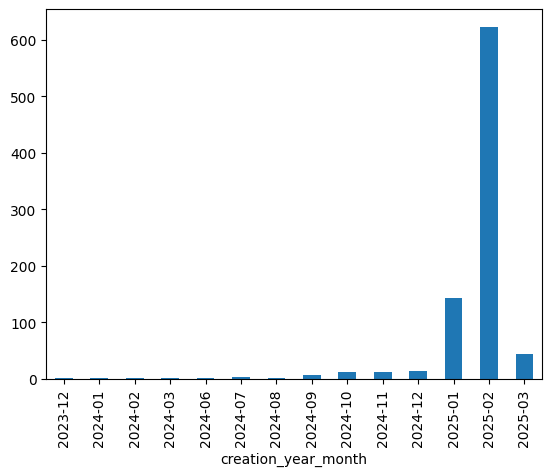

In [35]:
by_date= df.groupby('creation_year_month')
by_date.size().plot(kind='bar')

In [36]:
df=df.loc[df.creation_year_month>'2025-01']

In [37]:
df.shape

(668, 26)

In [38]:
'''data limitation: for key word search, we are only able to obtain around 200+notes for each key words, 
base on above plots and filter, decide to keep only 2025 feb onwards data to obtain relative fair overview'''

'data limitation: for key word search, we are only able to obtain around 200+notes for each key words, \nbase on above plots and filter, decide to keep only 2025 feb onwards data to obtain relative fair overview'

<Axes: xlabel='creation_date'>

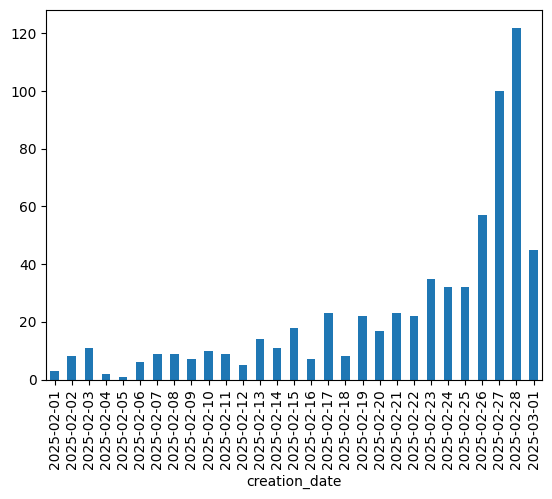

In [39]:
by_date= df.groupby('creation_date')
by_date.size().plot(kind='bar')

In [40]:
#getting Key figures
total_likes = sum(df['liked_count_parsed'])
total_collects = sum(df['collected_count_parsed'])
total_comments = sum(df['comment_count_parsed'])
total_shares = sum(df['share_count_parsed'])
print([total_likes,total_collects,total_comments,total_shares])

[1819874, 240123, 98778, 115514]


In [41]:
avg_likes = round(total_likes/df.shape[0])
avg_collects = round(total_collects/df.shape[0])
avg_comments = round(total_comments/df.shape[0])
avg_shares = round(total_shares/df.shape[0])
print([avg_likes,avg_collects,avg_comments,avg_shares])

[2724, 359, 148, 173]


In [42]:
#top liked post
df.sort_values('liked_count_parsed',ascending=False)[['title','desc','liked_count_parsed']]

title  \
220                                Ê∂àÂ§±ÁöÑ‰∏ÄÂπ¥ÈáåÔºåÂ§è‰ª•Êòº‰∏ÄÁõ¥ËøôÊ†∑ÁúãÁùÄ‰Ω†‚Ä¶‚Ä¶   
211                            Ë∫≤‰ªÄ‰πàÔºåÂàöÂàöËÉÜÂ≠ê‰∏çÊòØËøòÂæàÂ§ßÂêóÔºü| Â§è‰ª•Êòºcos   
2                                      Âíå‰ªñ‰ª¨Ëµ∞Ëøô‰πàËøë ‰Ω†Ë¶ÅÈÄºÊ≠ªÂì•Âì•Âêó   
4                                             Â§è‰ª•ÊòºÂ®ÉÂ®ÉÊú∫ÊùÄÊâã   
6                                ‚ÄúÂ§ßÁ¨®ËõãÂ§è‰ª•ÊòºÔºÅ‰∏çÊòØ‰∫≤ÁöÑ‰πüÂèØ‰ª•‰∫≤ÂïäÔºÅÔºÅÔºÅ‚Äù   
..                                                 ...   
2                                         Â∞±Ëøô‰πàÂíåÂ§è‰ª•ÊòºÂè±Âí§È£é‰∫ëüòº   
60   È•øÈ•øÈ•≠È•≠ÔºåÊúâÊ≤°ÊúâÂ§è‰ª•ÊòºÁöÑÂêå‰∫∫ÂÖ¨Ë∑ØÊñáÂ•ΩÊÉ≥ÂêÉ#Â§è‰ª•Êòº[ËØùÈ¢ò]# #‰π¶ËçíÊ±ÇÊé®Ëçê[ËØùÈ¢ò]# #ÊÅã‰∏éÊ∑±...   
68                                 Âè†Ôºå‰Ω†ÊúâÂ§è‰ª•ÊòºËøô‰πà‰ºüÂ§ßÁöÑËÑ∏ËøõÂÖ•Â§©Ë°å‚Ä¶‚Ä¶   
38                                        Â§è‰ª•ÊòºÂÖ®ÂõæÂç°‰∏ÄÊúâ500Ë°£   
69                                        Â§è‰ª•ÊòºÂÆöËΩ®50‰∏çÊûÅÈôêÈù¢Êùø   

                                                  desc  liked_count_parsed  
220  Ôªø#ÊÅã‰∏éÊ∑±Á©∫[ËØùÈ¢ò]#Ôªø Ôªø#Â§è‰ª•Êòº[ËØùÈ¢ò]#Ôªø Ôªø#Ê≤àÊòüÂõû[ËØùÈ¢ò]#Ôªø Ôªø#Áß¶ÂΩª[ËØùÈ¢ò]#...               76000  
211  #ÊÅã‰∏éÊ∑±Á©∫[ËØùÈ¢ò]# #Â§è‰ª•Êòº[ËØùÈ¢ò]# #ÊÅã‰∏éÊ∑±Á©∫ÊòéÊó•Êó†Â§ÑÂèØÈÄÉ[ËØùÈ¢ò]# #cos[ËØùÈ¢ò]...               65000  
2    #Â§è‰ª•Êòº[ËØùÈ¢ò]# #ÊÅã‰∏éÊ∑±Á©∫[ËØùÈ¢ò]# #cos[ËØùÈ¢ò]# #Ë•øË£ÖË∑™[ËØùÈ¢ò]#\n#Â§è‰ª•Êòº...               63000  
4    ‰ªéÊù•Ê≤°Êúâ‰∏ÄÊ¨°ÊäìËøô‰πàÂ§öËøá[doge]Ë∑üÂì•ÊäìÂ®ÉÂ®ÉÂ§™ÁàΩ‰∫Ü[ÂìáR]#ÊÅã‰∏éÊ∑±Á©∫[ËØùÈ¢ò]# #ÊÅã‰∏éÊ∑±Á©∫Â§è...               48000  
6               Ë∑Ø‰∫∫Â≠¶ÁîüÔºöÁ£ïÂà∞‰∫ÜÔºåËøô‰∏™ÊòØÁúüÁ£ïÂà∞‰∫Ü\n#ÊÅã‰∏éÊ∑±Á©∫[ËØùÈ¢ò]# #Â§è‰ª•Êòº[ËØùÈ¢ò]#               41000  
..                                                 ...                 ...  
2    Ëøá‰∫Ü‰∏§Âπ¥ÔºåÂ¶π‰πüÂÅ∑ÂÅ∑ÂéªÂèÇÂä†‰∫ÜÊØîÊ≠¶Â§ß‰ºöÔºåÂêÑÂÆ∂ÂæàÂø´Â∞±ËÆ§Âá∫Êù•Â¶πÁî®ÁöÑÊãõÂºèÊòØÂ§è‰ª•ÊòºÁöÑÂΩ±Â≠ê\nÂ¶πÂíåÂì•‰∏ÄÊ†∑Èªò...                   0  
60   È•øÈ•øÈ•≠È•≠ÔºåÊúâÊ≤°ÊúâÂ§è‰ª•ÊòºÁöÑÂêå‰∫∫ÂÖ¨Ë∑ØÊñáÂ•ΩÊÉ≥ÂêÉ#Â§è‰ª•Êòº[ËØùÈ¢ò]# #‰π¶ËçíÊ±ÇÊé®Ëçê[ËØùÈ¢ò]# #ÊÅã‰∏éÊ∑±...                   0  
68   #ÊÅã‰∏éÊ∑±Á©∫[ËØùÈ¢ò]##Â§è‰ª•Êòº[ËØùÈ¢ò]##Ëá™ÁªÑob11[ËØùÈ¢ò]##Ëêå[ËØùÈ¢ò]#\nÊòØ‰Ω†ÁöÑËç£Âπ∏Âìà...                   0  
38                            #ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº[ËØùÈ¢ò]# #ÊÅã‰∏éÊ∑±Á©∫[ËØùÈ¢ò]#                   0  
69     #ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº[ËØùÈ¢ò]# #Â§è‰ª•Êòº[ËØùÈ¢ò]##ÊÅã‰∏éÊ∑±Á©∫[ËØùÈ¢ò]# #Â§è‰ª•ÊòºÂÆöËΩ®50[ËØùÈ¢ò]#                   0  

[668 rows x 3 columns]

In [43]:
#top liked creator
df_creator = df.groupby("user_id").agg(
    total_likes=("liked_count_parsed", "sum"),
    total_collects=("collected_count_parsed", "sum"),
    total_comments=("comment_count_parsed", "sum"),
    total_shares=("share_count_parsed", "sum"),
    avg_likes=("liked_count_parsed", "mean"),
    avg_collects=("collected_count_parsed", "mean"),
    avg_comments=("comment_count_parsed", "mean"),
    avg_shares=("share_count_parsed", "mean"),
    post_count=("note_id", "count")
).reset_index()
df_creator = pd.merge(df_creator,df, how='left',on='user_id')
df_creator = df_creator.loc[:,['user_id', 'post_count','nickname', 'ip_location',
                               'total_likes','total_collects','total_comments','total_shares',
                               'avg_likes','avg_collects','avg_comments','avg_shares']]
df_creator.drop_duplicates('user_id').sort_values("avg_likes", ascending=False)

user_id  post_count                     nickname  \
114  5c32153a0000000007009f43           1                          ËíôÂæ∑ËØ∫   
19   5812d6615e87e74666be5148           1                        Êú™Â≤öRAN   
209  5ef717640000000001003693           1                          7x2   
407  63b7fa63000000002801b577           1                           Á∫æÂø±   
633  6770012f0000000015005da0           1                      Êù•‰∏Ä‰ªΩüçépie   
..                        ...         ...                          ...   
325  61aa1e340000000021027ce8           1                 ÈòøÂ¨¥_Ôºà‰πôÂ•≥ÂâßÊÉÖÊê¨ËøêÁâàÔºâ   
572  66876185000000001b016a5a           1                   Âç∑È±ºÈ•ºÊãÜÂç°ÔºàÈáçÁîüÁâàÔºâ   
573  66893f6f000000000f0373c1           1                        ÁîµÂ≠êÊ∂àÊØíÊ∞¥   
600  66f9403d000000001d03120b           1                        Á™ùÁ™ùË¢úË¢úüß¶   
640  6787049e000000000801e3de           1  thePowerpuffGirls_Buttercup   

    ip_location  total_likes  total_collects  total_comments  total_shares  \
114          Âπø‰∏ú        76000            6831            2303          5733   
19           ÂõõÂ∑ù        65000            6751            1893          6893   
209          ‰∏äÊµ∑        63000            7291            1345          1607   
407          ÂÆâÂæΩ        48000            2002            2664          4753   
633          ÈáçÂ∫Ü        37000            3093             393           433   
..          ...          ...             ...             ...           ...   
325          ‰∏äÊµ∑            0               1               0             1   
572          Ê±üË•ø            0               0               0             0   
573          ÊµôÊ±ü            0               0               4             0   
600          Ê±üËãè            0               0               0             0   
640          Ê≤≥Âçó            0               0               0             0   

     avg_likes  avg_collects  avg_comments  avg_shares  
114    76000.0        6831.0        2303.0      5733.0  
19     65000.0        6751.0        1893.0      6893.0  
209    63000.0        7291.0        1345.0      1607.0  
407    48000.0        2002.0        2664.0      4753.0  
633    37000.0        3093.0         393.0       433.0  
..         ...           ...           ...         ...  
325        0.0           1.0           0.0         1.0  
572        0.0           0.0           0.0         0.0  
573        0.0           0.0           4.0         0.0  
600        0.0           0.0           0.0         0.0  
640        0.0           0.0           0.0         0.0  

[544 rows x 12 columns]

In [44]:
#tag analysis
df['tags'] = df['tags'].apply(lambda x: x if isinstance(x, list) else [])  # Ensure it's a list
unique_tags = sorted(set(itertools.chain.from_iterable(df['tags'])))

In [45]:
co_occurrence = pd.DataFrame(0, index=unique_tags, columns=unique_tags)
for tag_list in df['tags']:
    for tag1, tag2 in itertools.combinations(tag_list, 2):
        co_occurrence.loc[tag1, tag2] += 1
        co_occurrence.loc[tag2, tag1] += 1  # Ensure symmetry
for tag in unique_tags:
    co_occurrence.loc[tag, tag] = sum(df['tags'].apply(lambda x: tag in x))

# Convert the matrix into a long-format DataFrame
co_occurrence_df = (
    co_occurrence.stack()
    .reset_index()
    .rename(columns={"level_0": "tag1", "level_1": "tag2", 0: "CoOccurrence"})
)

co_occurrence_df['combined_tag_1'] = co_occurrence_df['tag1'] + '-' + co_occurrence_df['tag2']
co_occurrence_df['combined_tag_2'] = co_occurrence_df['tag2'] + '-' + co_occurrence_df['tag1']
co_occurrence_df['drop_indicator'] = co_occurrence_df['combined_tag_1'] > co_occurrence_df['combined_tag_2']
co_occurrence_df = co_occurrence_df[~co_occurrence_df['drop_indicator']].drop(columns=['drop_indicator',
                                                                                      'combined_tag_1',
                                                                                      'combined_tag_2'])

# Sort by co-occurrence count (descending)
co_occurrence_df = co_occurrence_df.sort_values(by="CoOccurrence", ascending=False)
co_occurrence_df

tag1     tag2  CoOccurrence
67596       Â§è‰ª•Êòº      Â§è‰ª•Êòº           558
126808     ÊÅã‰∏éÊ∑±Á©∫     ÊÅã‰∏éÊ∑±Á©∫           456
67709       Â§è‰ª•Êòº     ÊÅã‰∏éÊ∑±Á©∫           408
137288  ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº  ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº           350
67729       Â§è‰ª•Êòº  ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº           277
...         ...      ...           ...
13                  bjdÂ¶Ü             0
14                 caleb             0
15                cattax             0
16                   cos             0
270912    È£ûÈ∏üÂõûËøòÊó•       ÈæôÊóè             0

[137026 rows x 3 columns]

In [46]:
# Create co-occurrence matrix (reusing previous co-occurrence calculation)
top_pairs = co_occurrence_df.sort_values(by="CoOccurrence", ascending=False).head(20)
filtered_matrix = top_pairs.pivot(index='tag1', columns='tag2', values='CoOccurrence').fillna(0)

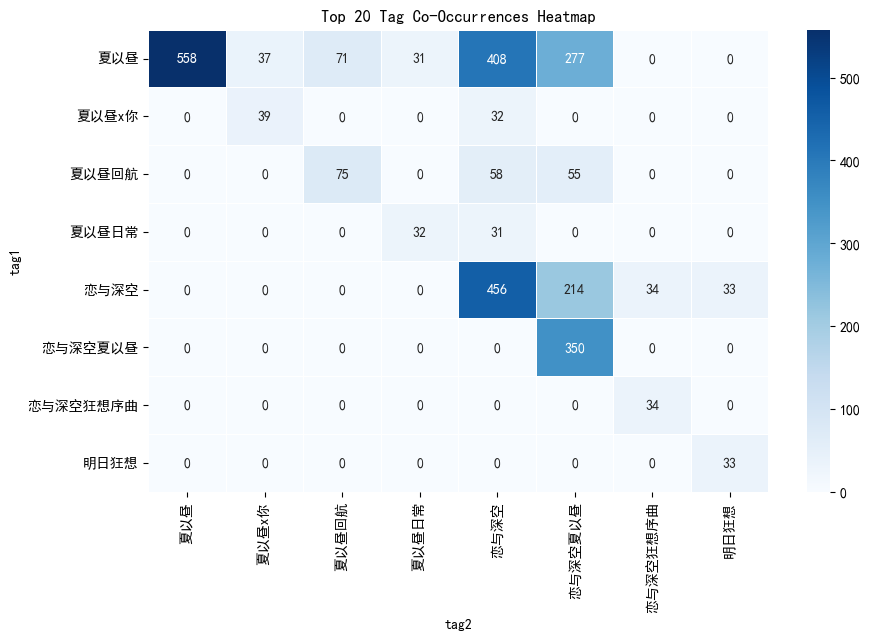

In [47]:
# Set Chinese font
plt.rcParams["font.sans-serif"] = ["SimHei"]  # Use SimHei (Èªë‰Ωì) for Chinese support
plt.rcParams["axes.unicode_minus"] = False  # Fix display of minus signs
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_matrix, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Top 20 Tag Co-Occurrences Heatmap")
plt.show()

In [48]:
#explore popular tags
all_tags = list(itertools.chain.from_iterable(df['tags']))
tag_counts = Counter(all_tags)
tag_counts_df = pd.DataFrame(tag_counts.items(), columns=['Tag', 'Count'])
tag_counts_df = tag_counts_df.sort_values(by='Count', ascending=False)
print(tag_counts_df.shape)
print(tag_counts_df.head(10))  # Show top 50 most popular tags

(523, 2)
          Tag  Count
7         Â§è‰ª•Êòº    558
0        ÊÅã‰∏éÊ∑±Á©∫    456
12    ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº    350
32      Â§è‰ª•ÊòºÂõûËà™     75
19      Â§è‰ª•Êòºx‰Ω†     39
131  ÊÅã‰∏éÊ∑±Á©∫ÁãÇÊÉ≥Â∫èÊõ≤     34
150      ÊòéÊó•ÁãÇÊÉ≥     33
78      Â§è‰ª•ÊòºÊó•Â∏∏     32
3         Ê≤àÊòüÂõû     28
4          ÈªéÊ∑±     27


In [49]:
#check popular tag coverage
# Select top N tags
top_n = 10 
top_tags = tag_counts_df['Tag'].head(top_n)
df['has_top_tag'] = df['tags'].apply(lambda x: any(tag in x for tag in top_tags))
df.head()
top_tag_coverage = df['has_top_tag'].mean() * 100  # Percentage of posts with top N tags
print(f"Top {top_n} tags appear in {top_tag_coverage:.2f}% of all posts.")

Top 10 tags appear in 97.46% of all posts.


In [50]:
# Sort tags by coverage percentage
total_tag_count = tag_counts_df['Count'].sum()
tag_counts_df['Coverage'] = (tag_counts_df['Count'] / total_tag_count) * 100
tag_counts_df = tag_counts_df.sort_values(by="Coverage", ascending=False)
# Keep only the top tags
top_n = 10
top_tags_df = tag_counts_df.head(top_n).copy()
top_tags_df
other_coverage = tag_counts_df.iloc[top_n:]['Coverage'].sum()
top_tags_df.loc[len(top_tags_df)] = ["Other Tags", tag_counts_df.iloc[top_n:]['Coverage'].sum(), other_coverage]

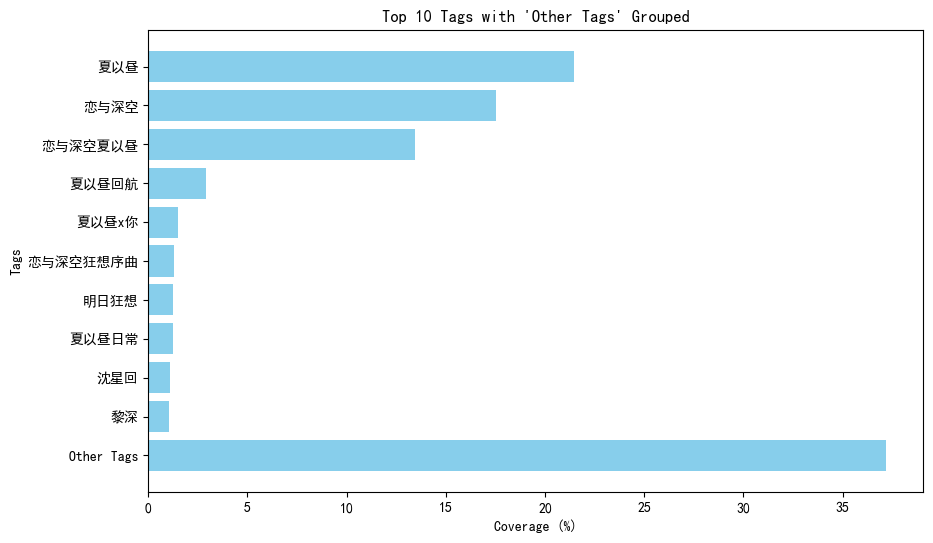

In [51]:
# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_tags_df['Tag'], top_tags_df['Coverage'], color='skyblue')
plt.xlabel("Coverage (%)")
plt.ylabel("Tags")
plt.title("Top 10 Tags with 'Other Tags' Grouped")
plt.gca().invert_yaxis()  # Invert for better readability
plt.show()

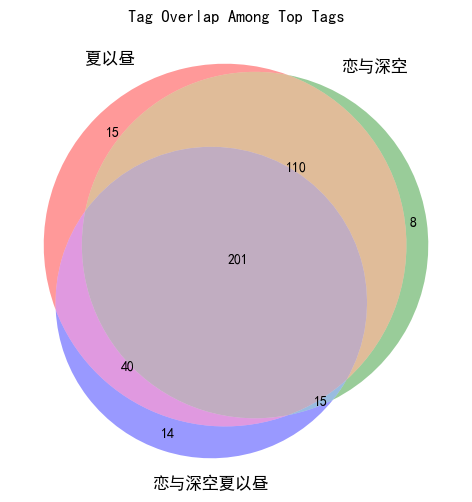

In [52]:
tag1 = "Â§è‰ª•Êòº"
tag2 = "ÊÅã‰∏éÊ∑±Á©∫"
tag3 = "ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº"

# Create boolean series for each tag
set1 = set(df[df['tags'].apply(lambda x: tag1 in x)].index)
set2 = set(df[df['tags'].apply(lambda x: tag2 in x)].index)
set3 = set(df[df['tags'].apply(lambda x: tag3 in x)].index)
# Plot Venn Diagram
plt.figure(figsize=(6, 6))
venn3([set1, set2, set3], set_labels=(tag1, tag2, tag3))
plt.title("Tag Overlap Among Top Tags")
plt.show()

In [53]:
#ip analysis
df['ip_location'].unique()

array(['Ê≤≥Âåó', 'Ê±üËãè', 'ÂπøË•ø', 'ÊπñÂåó', 'Âåó‰∫¨', 'Âπø‰∏ú', 'ÂõõÂ∑ù', 'Â±±‰∏ú', '‰∏äÊµ∑', 'ÈªëÈæôÊ±ü', 'Á¶èÂª∫',
       'Êó•Êú¨', 'ÊµôÊ±ü', 'Ë¥µÂ∑û', 'Ê≤≥Âçó', 'ËæΩÂÆÅ', 'ÈôïË•ø', 'Â±±Ë•ø', 'ÊπñÂçó', 'Ë•øÁè≠Áâô', 'Ê±üË•ø',
       '‰∏≠ÂõΩÂè∞Êπæ', 'ÂÆâÂæΩ', 'Â§©Ê¥•', 'Âä†ÊãøÂ§ß', 'ÈáçÂ∫Ü', 'ÂêâÊûó', 'Êæ≥Â§ßÂà©‰∫ö', 'Ëã±ÂõΩ', 'Êµ∑Âçó', 'Êñ∞Âä†Âù°',
       '‰∫ëÂçó', 'ÁæéÂõΩ', 'Âç∞Â∫¶Â∞ºË•ø‰∫ö', 'Êñ∞ÁñÜ', 'Ëè≤ÂæãÂÆæ', 'ÂÜÖËíôÂè§', '‰∏≠ÂõΩÊæ≥Èó®', 'Ê≤ôÁâπÈòøÊãâ‰ºØ', '‰∏≠ÂõΩÈ¶ôÊ∏Ø',
       'ÁîòËÇÉ', 'È©¨Êù•Ë•ø‰∫ö', 'ÊÑèÂ§ßÂà©', 'Êå™Â®Å'], dtype=object)

In [54]:
df_ip = df.groupby('ip_location').agg(
    total_likes=("liked_count_parsed", "sum"),
    total_collects=("collected_count_parsed", "sum"),
    total_comments=("comment_count_parsed", "sum"),
    total_shares=("share_count_parsed", "sum"),
    avg_likes=("liked_count_parsed", "mean"),
    avg_collects=("collected_count_parsed", "mean"),
    avg_comments=("comment_count_parsed", "mean"),
    avg_shares=("share_count_parsed", "mean"),
    post_count=("note_id", "count")
).reset_index()
df_ip.sort_values('post_count',ascending=False)

ip_location  total_likes  total_collects  total_comments  total_shares  \
15          Âπø‰∏ú       274808           43341           14118         18364   
22          Ê±üËãè       104530           14951            7889         11274   
27          ÊµôÊ±ü       123715           14851            9388          7937   
0           ‰∏äÊµ∑       153250           21521            6808          4496   
25          Ê≤≥Âåó         9107             673            1954           345   
10          ÂõõÂ∑ù       155079           20785            6607         12304   
7           Âåó‰∫¨        93548           12158            5115          4917   
13          Â±±‰∏ú        57952            6923            2537          5986   
39          ËæΩÂÆÅ        66987            9095            4965          6852   
29          ÊπñÂåó        29540            3794            2795          1940   
26          Ê≤≥Âçó        51203            7708            2501          3580   
41          ÈôïË•ø        51951            6067            2559          2462   
30          ÊπñÂçó        38271            3878            1620          1195   
33          Á¶èÂª∫        59772            7096            4099          5615   
12          ÂÆâÂæΩ        77061            7448            4001          7327   
40          ÈáçÂ∫Ü        61539            9405            2064          1898   
16          ÂπøË•ø        23473            3257             966           578   
43         ÈªëÈæôÊ±ü        36270            4805            2580          1627   
21          Êó•Êú¨        81535            9612            2324          4247   
34          ÁæéÂõΩ       141226           15777            4255          5010   
1         ‰∏≠ÂõΩÂè∞Êπæ        13560            1941             821          1154   
14          Â±±Ë•ø        13844            1651             611           635   
6          Âä†ÊãøÂ§ß        14883            1597             458           625   
11          Â§©Ê¥•        18518            2337             814          1261   
38          Ë¥µÂ∑û         5071             290             596           280   
4           ‰∫ëÂçó        10494            1277             858           407   
23          Ê±üË•ø          757             163             121            13   
3         ‰∏≠ÂõΩÈ¶ôÊ∏Ø         2317             460             403           105   
28          Êµ∑Âçó        10067            1243            1619          1331   
5          ÂÜÖËíôÂè§        16053            2411            1118           556   
9           ÂêâÊûó         5507             509            1186           418   
20          Êñ∞ÁñÜ           13               5               0             2   
31        Êæ≥Â§ßÂà©‰∫ö         1072              15              16            10   
36         Ëè≤ÂæãÂÆæ           12               0               8             0   
35          Ëã±ÂõΩ         1331            1032             461            61   
8        Âç∞Â∫¶Â∞ºË•ø‰∫ö           11               1               0             0   
2         ‰∏≠ÂõΩÊæ≥Èó®            0               0               0             0   
17         ÊÑèÂ§ßÂà©         6394            1190             168           187   
18          Êå™Â®Å         2102             292             183           306   
19         Êñ∞Âä†Âù°         1000              10              10            10   
24       Ê≤ôÁâπÈòøÊãâ‰ºØ           13               0               1             0   
32          ÁîòËÇÉ          491              66             103            52   
37         Ë•øÁè≠Áâô            1               0               2             0   
42        È©¨Êù•Ë•ø‰∫ö         5546             488              76           147   

       avg_likes  avg_collects  avg_comments  avg_shares  post_count  
15   3019.868132    476.274725    155.142857  201.802198          91  
22   2133.265306    305.122449    161.000000  230.081633          49  
27   2577.395833    309.395833    195.583333  165.354167          48  
0    3260.638298    457.893617 

In [55]:
# Define list of Chinese provinces/regions
china_regions = [
    'Ê≤≥Âåó', 'Ê±üËãè', 'ÂπøË•ø', 'ÊπñÂåó', 'Âåó‰∫¨', 'Âπø‰∏ú', 'ÂõõÂ∑ù', 'Â±±‰∏ú', '‰∏äÊµ∑', 'ÈªëÈæôÊ±ü', 'Á¶èÂª∫',
    'ÊµôÊ±ü', 'Ë¥µÂ∑û', 'Ê≤≥Âçó', 'ËæΩÂÆÅ', 'ÈôïË•ø', 'Â±±Ë•ø', 'ÊπñÂçó', 'Ê±üË•ø', '‰∏≠ÂõΩÂè∞Êπæ', 'ÂÆâÂæΩ',
    'Â§©Ê¥•', 'ÈáçÂ∫Ü', 'ÂêâÊûó', 'Êµ∑Âçó', '‰∫ëÂçó', 'Êñ∞ÁñÜ', 'ÂÜÖËíôÂè§', '‰∏≠ÂõΩÊæ≥Èó®', '‰∏≠ÂõΩÈ¶ôÊ∏Ø', 'ÁîòËÇÉ'
]

df_ip['ip_location_grouped'] = df_ip['ip_location'].apply(
    lambda x: x if (x in china_regions) or 
                ((x not in china_regions) and 
                 ((df_ip.loc[df_ip['ip_location'] == x, 'post_count'].values[0] > 5) or 
                  (df_ip.loc[df_ip['ip_location'] == x, 'total_likes'].values[0] >= 1000)))
    else "Others"
)

In [56]:
#recalculate figures for "others"
ip_groups = df_ip['ip_location_grouped'].unique()
df['ip_location_grouped'] = df['ip_location'].apply(
    lambda x: x if (x in ip_groups) 
    else "Others"
)

df_ip_grouped = df.groupby('ip_location_grouped').agg(
    total_likes=("liked_count_parsed", "sum"),
    total_collects=("collected_count_parsed", "sum"),
    total_comments=("comment_count_parsed", "sum"),
    total_shares=("share_count_parsed", "sum"),
    avg_likes=("liked_count_parsed", "mean"),
    avg_collects=("collected_count_parsed", "mean"),
    avg_comments=("comment_count_parsed", "mean"),
    avg_shares=("share_count_parsed", "mean"),
    post_count=("note_id", "count")
).reset_index()
df_ip_grouped.sort_values('post_count',ascending=False)

ip_location_grouped  total_likes  total_collects  total_comments  \
15                  Âπø‰∏ú       274808           43341           14118   
22                  Ê±üËãè       104530           14951            7889   
26                  ÊµôÊ±ü       123715           14851            9388   
1                   ‰∏äÊµ∑       153250           21521            6808   
24                  Ê≤≥Âåó         9107             673            1954   
10                  ÂõõÂ∑ù       155079           20785            6607   
8                   Âåó‰∫¨        93548           12158            5115   
13                  Â±±‰∏ú        57952            6923            2537   
36                  ËæΩÂÆÅ        66987            9095            4965   
28                  ÊπñÂåó        29540            3794            2795   
25                  Ê≤≥Âçó        51203            7708            2501   
38                  ÈôïË•ø        51951            6067            2559   
29                  ÊπñÂçó        38271            3878            1620   
32                  Á¶èÂª∫        59772            7096            4099   
37                  ÈáçÂ∫Ü        61539            9405            2064   
12                  ÂÆâÂæΩ        77061            7448            4001   
16                  ÂπøË•ø        23473            3257             966   
40                 ÈªëÈæôÊ±ü        36270            4805            2580   
21                  Êó•Êú¨        81535            9612            2324   
33                  ÁæéÂõΩ       141226           15777            4255   
14                  Â±±Ë•ø        13844            1651             611   
2                 ‰∏≠ÂõΩÂè∞Êπæ        13560            1941             821   
0               Others           37               1              11   
7                  Âä†ÊãøÂ§ß        14883            1597             458   
11                  Â§©Ê¥•        18518            2337             814   
35                  Ë¥µÂ∑û         5071             290             596   
23                  Ê±üË•ø          757             163             121   
5                   ‰∫ëÂçó        10494            1277             858   
4                 ‰∏≠ÂõΩÈ¶ôÊ∏Ø         2317             460             403   
27                  Êµ∑Âçó        10067            1243            1619   
6                  ÂÜÖËíôÂè§        16053            2411            1118   
30                Êæ≥Â§ßÂà©‰∫ö         1072              15              16   
9                   ÂêâÊûó         5507             509            1186   
20                  Êñ∞ÁñÜ           13               5               0   
34                  Ëã±ÂõΩ         1331            1032             461   
3                 ‰∏≠ÂõΩÊæ≥Èó®            0               0               0   
19                 Êñ∞Âä†Âù°         1000              10              10   
18                  Êå™Â®Å         2102             292             183   
17                 ÊÑèÂ§ßÂà©         6394            1190             168   
31                  ÁîòËÇÉ          491              66             103   
39                È©¨Êù•Ë•ø‰∫ö         5546             488              76   

    total_shares     avg_likes  avg_collects  avg_comments  avg_shares  \
15         18364   3019.868132    476.274725    155.142857  201.802198   
22         11274   2133.265306    305.122449    161.000000  230.081633   
26          7937   2577.395833    309.395833    195.583333  165.354167   
1           4496   3260.638298    457.893617    144.851064   95.659574   
24           345    216.833333     16.023810     46.523810    8.214286   
10         12304   4081.026316    546.973684    173.868421  323.789474   
8           4917   2672.800000    347.371429    146.142857  140.485714   
13          5986   1811.000000    216.343750     79.281250  187.062500   
36          6852   2093.343750    284.218750    155.156250  214.125000   
28          1940   1230.833333    158.083333    116.458333   80.833333   
25          3580

In [57]:
df_ip_grouped['ip_location_grouped'].unique()

array(['Others', '‰∏äÊµ∑', '‰∏≠ÂõΩÂè∞Êπæ', '‰∏≠ÂõΩÊæ≥Èó®', '‰∏≠ÂõΩÈ¶ôÊ∏Ø', '‰∫ëÂçó', 'ÂÜÖËíôÂè§', 'Âä†ÊãøÂ§ß', 'Âåó‰∫¨',
       'ÂêâÊûó', 'ÂõõÂ∑ù', 'Â§©Ê¥•', 'ÂÆâÂæΩ', 'Â±±‰∏ú', 'Â±±Ë•ø', 'Âπø‰∏ú', 'ÂπøË•ø', 'ÊÑèÂ§ßÂà©', 'Êå™Â®Å', 'Êñ∞Âä†Âù°',
       'Êñ∞ÁñÜ', 'Êó•Êú¨', 'Ê±üËãè', 'Ê±üË•ø', 'Ê≤≥Âåó', 'Ê≤≥Âçó', 'ÊµôÊ±ü', 'Êµ∑Âçó', 'ÊπñÂåó', 'ÊπñÂçó', 'Êæ≥Â§ßÂà©‰∫ö',
       'ÁîòËÇÉ', 'Á¶èÂª∫', 'ÁæéÂõΩ', 'Ëã±ÂõΩ', 'Ë¥µÂ∑û', 'ËæΩÂÆÅ', 'ÈáçÂ∫Ü', 'ÈôïË•ø', 'È©¨Êù•Ë•ø‰∫ö', 'ÈªëÈæôÊ±ü'],
      dtype=object)

In [57]:
tag_counts_df.head(20)

Tag  Count   Coverage
7         Â§è‰ª•Êòº    558  21.469796
0        ÊÅã‰∏éÊ∑±Á©∫    456  17.545210
12    ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº    350  13.466718
32      Â§è‰ª•ÊòºÂõûËà™     75   2.885725
19      Â§è‰ª•Êòºx‰Ω†     39   1.500577
131  ÊÅã‰∏éÊ∑±Á©∫ÁãÇÊÉ≥Â∫èÊõ≤     34   1.308195
150      ÊòéÊó•ÁãÇÊÉ≥     33   1.269719
78      Â§è‰ª•ÊòºÊó•Â∏∏     32   1.231243
3         Ê≤àÊòüÂõû     28   1.077337
4          ÈªéÊ∑±     27   1.038861
6          Áß¶ÂΩª     27   1.038861
81    Â§è‰ª•Êòºob11     25   0.961908
83      Caleb     25   0.961908
82       ob11     25   0.961908
79      Áà±Âú®Â§è‰ª•Êòº     25   0.961908
5          Á•ÅÁÖú     22   0.846479
63      oocËá¥Ê≠â     20   0.769527
38      Â§è‰ª•ÊòºÂêå‰∫∫     18   0.692574
119     Â§è‰ª•ÊòºÂõûÊù•     15   0.577145
99        ‰πôÂ•≥Âêë     12   0.461716

In [58]:
#explore relationship between like and comments
#try to group general posts and single-character posts - base on my own understanding of players' social media behavior 
exclude_tags = ['Ê≤àÊòüÂõû','ÈªéÊ∑±','Áß¶ÂΩª','Á•ÅÁÖú']
caleb_tags = ['Â§è‰ª•Êòº','ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº','Â§è‰ª•ÊòºÂõûËà™','Â§è‰ª•Êòºx‰Ω†','Caleb','Áà±Âú®Â§è‰ª•Êòº','Â§è‰ª•ÊòºÂêå‰∫∫','Â§è‰ª•ÊòºÂõûÊù•','Â§è‰ª•ÊòºÊó•Â∏∏']

def classify_post(tags):
    tags_set = set(tags)  # Convert list to set for fast lookup
    if any(tag in tags_set for tag in caleb_tags):  # Rule 1: Caleb-related tags exist
        if any(tag in tags_set for tag in exclude_tags):  # Rule 2: Exclude tags exist
            return "General Post"
        return "Caleb Post"
    return "General Post"  # Default if no Caleb tags found

df['post_type'] = df['tags'].apply(classify_post)

#quick eye-scan to check relevancy
df[['tags', 'title','post_type']].tail(50)

tags  \
87                                      [Â§è‰ª•Êòº, ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº]   
91                        [ÊÅã‰∏éÊ∑±Á©∫, Ê≤àÊòüÂõû, Á•ÅÁÖú, Â§è‰ª•Êòº, Áß¶ÂΩª, ÈªéÊ∑±]   
92          [ÊÅã‰∏éÊ∑±Á©∫, Â§è‰ª•Êòº, ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº, ÊÄ™‰∏çÂ•ΩÊÑèÊÄùÁöÑ, Â§è‰ª•ÊòºÂõûËà™, Â§è‰ª•ÊòºÊó•Â∏∏]   
109                               [Â§è‰ª•Êòº, ÊÅã‰∏éÊ∑±Á©∫, ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº]   
114                                [ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº, ÊÅã‰∏éÊ∑±Á©∫, Êë∏È±º]   
121                             [ÊÅã‰∏éÊ∑±Á©∫, Â§è‰ª•Êòº, ‰∫ãÊÉÖÂºÄÂßãÂèòÂæóÊúâË∂£‰∫Ü]   
126                                        [ÊÅã‰∏éÊ∑±Á©∫, Â§è‰ª•Êòº]   
140                                              [Â§è‰ª•Êòº]   
143  [ÊÅã‰∏éÊ∑±Á©∫, ÊÅã‰∏éÊ∑±Á©∫ÁãÇÊÉ≥Â∫èÊõ≤, ÊòéÊó•ÁãÇÊÉ≥, ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº, Â§è‰ª•Êòº, Â§è‰ª•ÊòºÂõûËà™, Â§è‰ª•...   
147               [ÊÅã‰∏éÊ∑±Á©∫, ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº, Â§è‰ª•ÊòºÂõûËà™, ÊúâÁÇπÊößÊòß‰∫Ü, ‰Ω†Â∞±ÂÆ†ÊàëÂêß]   
191    [ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº, Â§è‰ª•Êòº, Â§è‰ª•ÊòºÂêå‰∫∫, Âêå‰∫∫Âõæ, qÁâà, ÊÅã‰∏éÊ∑±Á©∫, ËÆØÈ£ûËæìÂÖ•Ê≥ï, ÊÅãÁà±]   
193                    [ÊÅã‰∏éÊ∑±Á©∫, Â§è‰ª•Êòº, Â∞èÈºªÂòé, ÁªòÁîª, ‰∏Ä‰∏™‰∫∫‰∏äÁΩëÊå∫Êó†Âä©ÁöÑ]   
194                                        [Â§è‰ª•Êòº, ÊÅã‰∏éÊ∑±Á©∫]   
195                                    [ÁªòÁîª, ÊÅã‰∏éÊ∑±Á©∫, Â§è‰ª•Êòº]   
197             [ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº, Áé©ÊÅã‰∏éÊ∑±Á©∫Âì™Êúâ‰∏çÁñØÁöÑ, Â§è‰ª•ÊòºÊÉ≥‰Ω†‰∫Ü, Â§è‰ª•ÊòºÊàëÂ•ΩÊÉ≥‰Ω†]   
203                              [Ê£âËä±Â®ÉÂ®É, ÊÅã‰∏éÊ∑±Á©∫, Â§è‰ª•Êòº, ÈªéÊ∑±]   
212                [ÊÅã‰∏éÊ∑±Á©∫, Â§è‰ª•Êòº, ÊÅã‰∏éÊ∑±Á©∫ÊÇ∏Âä®, ÊÅã‰∏éÊ∑±Á©∫ÁãÇÊÉ≥Â∫èÊõ≤, ÊòéÊó•ÁãÇÊÉ≥]   
214                                 [Â§è‰ª•Êòº, Ê≤°Êúâ‰Ω†ÊàëÂèØ, ÊÄé‰πàÂäûÂïä]   
220  [ÊÅã‰∏éÊ∑±Á©∫, Â§è‰ª•Êòº, Ê≤àÊòüÂõû, Áß¶ÂΩª, ÈªéÊ∑±, Á•ÅÁÖú, ÊÅã‰∏éÊ∑±Á©∫ÁãÇÊÉ≥Â∫èÊõ≤, ÊòéÊó•ÁãÇÊÉ≥, ÊÅã...   
229  [ÊÅã‰∏éÊ∑±Á©∫, Áß¶ÂΩª, ÈªéÊ∑±, Ê≤àÊòüÂõû, Á•ÅÁÖú, Â§è‰ª•Êòº, ÊÅã‰∏éÊ∑±Á©∫Âêå‰∫∫, ÊÅã‰∏éÊ∑±Á©∫ÂÖ±Áªò, ‰πô...   
235                                     [Â§è‰ª•Êòº, ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº]   
256                                    [ÊÅã‰∏éÊ∑±Á©∫, ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº]   
261                          [ÊÅã‰∏éÊ∑±Á©∫, Â§è‰ª•Êòº, Â•ΩÂà©Êù•, ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº]   
276                                 [ÊÅã‰∏éÊ∑±Á©∫, Â§è‰ª•Êòº, Â§è‰ª•ÊòºÂõûËà™]   
277  [ÊÅã‰∏éÊ∑±Á©∫, ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº, Â§è‰ª•Êòº, Â§è‰ª•ÊòºÂõûËà™, ‰πôÂ•≥Âπ¥Â§úÈ•≠, Ê∏∏ÊàèÁé©ÂÆ∂ËøáÂπ¥ÊñπÂºè, ‰æµ...   
287                                     [Â§è‰ª•Êòº, ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº]   
301  [ÊÅã‰∏éÊ∑±Á©∫, Â§è‰ª•Êòº, Áü≥Â°ëÁ≤òÂúü, ÊàëÁöÑÊâãÂ∑•Êó•Â∏∏, ÊâãÂ∑•, Á≤òÂúü, 2025ÂÖ¥Ë∂£‰∏çÊâìÁÉä, Êò•...   
304                           [ÊÅã‰∏éÊ∑±Á©∫, Â§è‰ª•Êòº, ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº, Á∫¶Á®ø]   
316                               [Â§è‰ª•Êòº, ÊÅã‰∏éÊ∑±Á©∫, ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº]   
318                                        [ÊÅã‰∏éÊ∑±Á©∫, Â§è‰ª•Êòº]   
320                                        [ÊÅã‰∏éÊ∑±Á©∫, Â§è‰ª•Êòº]   
332  [ÊÅã‰∏éÊ∑±Á©∫, Â§è‰ª•Êòº, Â§è‰ª•ÊòºÂõûËà™, Â§è‰ª•Êòºx‰Ω†, Â§è‰ª•ÊòºÂêå‰∫∫, ‰∏éÊÅã‰∏éÊ∑±Á©∫ÂÖ±Áªò, ÊÅ®Âú®ÊÅã‰∏éÊ∑±Á©∫]   
338                               [ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº, Â§è‰ª•Êòº, ÊÅã‰∏éÊ∑±Á©∫]   
341                                  [ÊÅã‰∏éÊ∑±Á©∫, ‰πôÂ•≥Âêë, ‰πôÂ•≥Ê∏∏Êàè]   
345                               [Â§è‰ª•Êòº, ÊÅã‰∏éÊ∑±Á©∫, ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº]   
347                           [Â§è‰ª•Êòº, ‰ºØÊÅ©Â±±, Ë°®ÊÉÖÂåÖ, ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº]   
356                               [ÊÅã‰∏éÊ∑±Á©∫, ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº, Â§è‰ª•Êòº]   
357                                        [ÊÅã‰∏éÊ∑±Á©∫, Â§è‰ª•Êòº]   
360                                   [ÊÅã‰∏éÊ∑±Á©∫, Â§è‰ª•Êòº, Â§è‰ª•ÁÜä]   
372                                        [ÊÅã‰∏éÊ∑±Á©∫, Â§è‰ª•Êòº]   
379                                        [ÊÅã‰∏éÊ∑±Á©∫, Â§è‰ª•Êòº]   
389                              [Â§è‰ª•ÊòºÂõûËà™, Â§è‰ª•Êòº, ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº]   
397                           [ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº, ÊÅã‰∏éÊ∑±Á©∫, ÊàëÊÑøÁß∞‰πã‰∏∫ÊÑüËßâ]   
399                              [Â§è‰ª•Êòº, Â§è‰ª•ÊòºÂõûËà™, ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº]   
40

In [73]:
# Calculate comment-to-like ratio
df['comment_like_ratio'] = df.apply(
    lambda row: row['comment_count_parsed'] / row['liked_count_parsed'] if row['liked_count_parsed'] > 0 else None, 
    axis=1
)
df_comments = df.dropna(subset=['comment_like_ratio'])
df_comments[['tags', 'title','post_type','comment_like_ratio']].sort_values('comment_like_ratio',ascending = False)

tags  \
143          [ÊÅã‰∏éÊ∑±Á©∫, Áß¶ÂΩª, ÈªéÊ∑±, Â§è‰ª•Êòº]   
313            [ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº, ÊÅã‰∏éÊ∑±Á©∫‰ª£Êâì]   
23        [ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº, Â§è‰ª•Êòº, ÊÅã‰∏éÊ∑±Á©∫Â•ΩÂèã]   
430        [ÊÅã‰∏éÊ∑±Á©∫, Â§è‰ª•Êòº, ËøôÂØπÊàëÁúüÁöÑÂæàÈáçË¶Å]   
306      [ÊÅã‰∏éÊ∑±Á©∫, ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº, ÊÅã‰∏éÊ∑±Á©∫‰ª£ËÇù]   
..                           ...   
35          [Â§è‰ª•Êòº, ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº, ÊÅã‰∏éÊ∑±Á©∫]   
45                   [Â§è‰ª•Êòº, ÊÅã‰∏éÊ∑±Á©∫]   
40                [ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº, Â§è‰ª•Êòº]   
9          [ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº, Â§è‰ª•Êòº, Â§è‰ª•ÊòºÂõûËà™]   
5    [ÊÅã‰∏éÊ∑±Á©∫, Â§è‰ª•Êòº, ÂÜõË£Ö, Á´ãÁâå, ÂêßÂîß, ÂæΩÁ´†]   

                                                 title     post_type  \
143                                 ÂïäÂïäÂïäÔºÅÊÅã‰∏éÊ∑±Á©∫Ë¶ÅÊãçÊàêÁîµËßÜÂâß‰∫ÜÔºÅÔºÅÔºÅ  General Post   
313        ÊâæÂ§è‰ª•ÊòºËØïÁÇº50ÂÖ≥‰ª£Êâì#ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº[ËØùÈ¢ò]# #ÊÅã‰∏éÊ∑±Á©∫‰ª£Êâì[ËØùÈ¢ò]# ÔºåÊòØÂÆòÊúçÁöÑ    Caleb Post   
23                                         ÊúâÊ≤°ÊúâÂ§è‰ª•ÊòºÂçïÊé®‚ûïÊàëü•π    Caleb Post   
430                                                Êî∂Êî∂Êî∂    Caleb Post   
306  Ëπ≤‰∏™lysk‰ª£ÊâìÔºåÊâìÂ§è‰ª•Êòº50ËΩ®ÈÅì\n\t\n#ÊÅã‰∏éÊ∑±Á©∫[ËØùÈ¢ò]# #ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº[ËØùÈ¢ò]...    Caleb Post   
..                                                 ...           ...   
35                                   Â§è‰ª•ÊòºÁâµÁªäÂ∫¶ 83 Á∫ßÔºåÊó†Â∞ΩÂ§èÊª°Ëä±    Caleb Post   
45                                ÊàëÊ±Ç‰Ω†ÊîæËøáÂ§è‰ª•ÊòºÂêßÂ§è‰ª•ÊòºÁúüÁöÑ‰∏ç‰ºöËøô‰πàËØ¥ËØù    Caleb Post   
40                                   Êàë‰∏çÂñúÊ¨¢ÔºåÂõ†‰∏∫Êµ∑Ê£†Ëä±‰ºöÊääÂ§è‰ª•ÊòºÂ∏¶Ëµ∞    Caleb Post   
9                                             Ê¨¢ËøéÂõûÂÆ∂ÔºåÂ§è‰ª•Êòº    Caleb Post   
5                                          ÈÖ∑Â∏ÖÈÖ∑Â∏ÖÁöÑÂì•Âì•Â§è‰ª•ÊòºÔºÅ    Caleb Post   

     comment_like_ratio  
143               100.0  
313                46.0  
23                 21.0  
430                13.5  
306                13.0  
..                  ...  
35                  0.0  
45                  0.0  
40                  0.0  
9                   0.0  
5                   0.0  

[632 rows x 4 columns]

In [74]:
#exclude outliers
df_comments = df_comments.drop(index=[143,313,23,430,306])
df_comments[['tags', 'title','post_type','comment_like_ratio']].sort_values('comment_like_ratio',ascending = False)

tags  \
223                                   [ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº, Â§è‰ª•Êòº]   
389  [ÊÅã‰∏éÊ∑±Á©∫, ÈªéÊ∑±, Â§è‰ª•Êòº, ÊÅã‰∏éÊ∑±Á©∫ÊòéÊó•Â∫èÊõ≤, ÊÅã‰∏éÊ∑±Á©∫ÊòéÊó•Êó†Â§ÑÂèØÈÄÉ, ÊÅã‰∏éÊ∑±Á©∫ÁãºÂ∞æÊ∑∑Ê±†]   
84                         [ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº, Â§è‰ª•Êòº10cmÂ®ÉÂ®É, Â§è‰ª•Êòº]   
311                                  [ÊÅã‰∏éÊ∑±Á©∫, ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº]   
304                         [ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº, Â§è‰ª•Êòº, ÊÅã‰∏éÊ∑±Á©∫ËΩ®ÈÅìËØïÁÇº]   
..                                               ...   
15                           [Â§è‰ª•Êòº, nymyxgwcldbsndgg]   
11                                             [Â§è‰ª•Êòº]   
14                              [ÊÅã‰∏éÊ∑±Á©∫, ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº, Â§è‰ª•Êòº]   
5                        [ÊÅã‰∏éÊ∑±Á©∫, Â§è‰ª•Êòº, ÂÜõË£Ö, Á´ãÁâå, ÂêßÂîß, ÂæΩÁ´†]   
9                              [ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº, Â§è‰ª•Êòº, Â§è‰ª•ÊòºÂõûËà™]   

                                                 title     post_type  \
223  ÊÉ≥Áü•ÈÅìÂ∞èËãπÊûú‰ª¨ÊúÄÂñúÊ¨¢Â§è‰ª•ÊòºÂì™Â•óË°£ÊúçorÂç°Èù¢[ÂìáR]\n#ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº[ËØùÈ¢ò]# #Â§è‰ª•Êòº[...    Caleb Post   
389                                          ÈÄâÈªéÊ∑±ËøòÊòØÂ§è‰ª•Êòºüíß  General Post   
84   Ê±ÇÊé®ËçêÔºÅÂ§è‰ª•Êòº10cmÂ®ÉÂ®É[ÂêàÂçÅR]#ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº[ËØùÈ¢ò]# #Â§è‰ª•Êòº10cmÂ®ÉÂ®É[ËØùÈ¢ò]...    Caleb Post   
311  ÊòØÁöÑÊàëÂèàÊù•‰∫ÜÔºåÊé•Â§è‰ª•ÊòºËΩ®ÈÅì50Êó†ÂÅø‰ª£Êâì[doge]#ÊÅã‰∏éÊ∑±Á©∫[ËØùÈ¢ò]# #ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº[ËØù...    Caleb Post   
304  Â§è‰ª•ÊòºÂÆöËΩ®50Â±ÇÂà∞Â∫ïÊÄé‰πàËøáÂïäüò≠#ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº[ËØùÈ¢ò]# #Â§è‰ª•Êòº[ËØùÈ¢ò]# #ÊÅã‰∏éÊ∑±Á©∫ËΩ®ÈÅì...    Caleb Post   
..                                                 ...           ...   
15                                             Â§è‰ª•ÊòºÁî∑È´òÊó∂ÂÄô    Caleb Post   
11                                           Â§è‰ª•ÊòºÂºÄÊñ∞ÂìÅÂèëÂ∏É‰ºö    Caleb Post   
14   #ÊÅã‰∏éÊ∑±Á©∫[ËØùÈ¢ò]# [Á∫¢Ëâ≤ÂøÉÂΩ¢R]#ÊÅã‰∏éÊ∑±Á©∫Â§è‰ª•Êòº[ËØùÈ¢ò]# [Á∫¢Ëâ≤ÂøÉÂΩ¢R]#Â§è‰ª•Êòº[ËØùÈ¢ò...    Caleb Post   
5                                          ÈÖ∑Â∏ÖÈÖ∑Â∏ÖÁöÑÂì•Âì•Â§è‰ª•ÊòºÔºÅ    Caleb Post   
9                                             Ê¨¢ËøéÂõûÂÆ∂ÔºåÂ§è‰ª•Êòº    Caleb Post   

     comment_like_ratio  
223           10.000000  
389            9.000000  
84             8.750000  
311            7.333333  
304            6.666667  
..                  ...  
15             0.000000  
11             0.000000  
14             0.000000  
5              0.000000  
9              0.000000  

[622 rows x 4 columns]

C:\Users\Jasmine\AppData\Local\Temp\ipykernel_2784\1133204384.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_comments['post_type'], y=df_comments['comment_like_ratio'], palette="Blues")


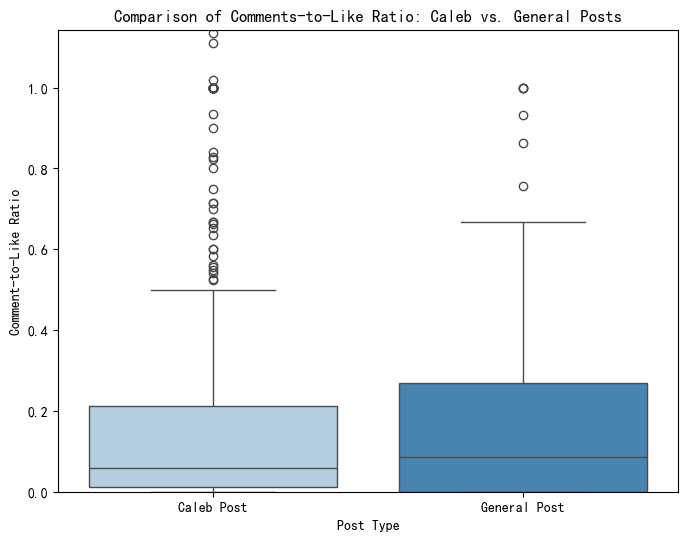

In [76]:
# Boxplot to compare General vs. Caleb posts
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_comments['post_type'], y=df_comments['comment_like_ratio'], palette="Blues")
plt.ylim(0, df['comment_like_ratio'].quantile(0.95))  # Crop at the 95th percentile
plt.ylabel("Comment-to-Like Ratio")
plt.xlabel("Post Type")
plt.title("Comparison of Comments-to-Like Ratio: Caleb vs. General Posts")
plt.show()

<Figure size 800x600 with 0 Axes>

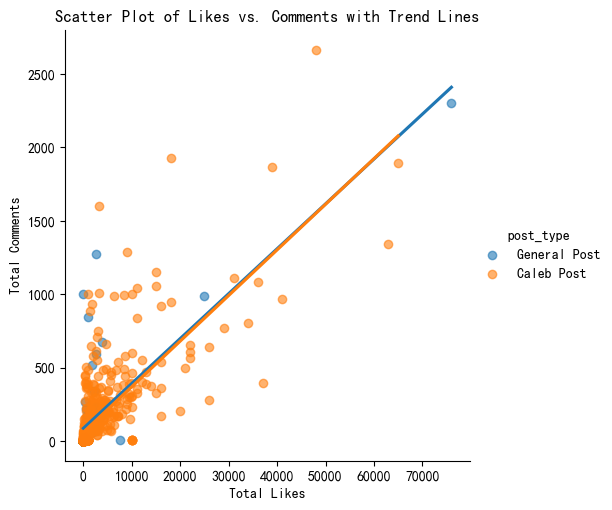

In [77]:
# Scatter plot of likes vs. comments
plt.figure(figsize=(8, 6))
sns.lmplot(
    data=df, 
    x="liked_count_parsed", 
    y="comment_count_parsed", 
    hue="post_type", 
    ci=None, 
    scatter_kws={"alpha": 0.6}
)

plt.xlabel("Total Likes")
plt.ylabel("Total Comments")
plt.title("Scatter Plot of Likes vs. Comments with Trend Lines")
plt.show()
